# CASE STUDY: MARKETING DEPARTMENT


## Key Learning Outcomes:
- Understand how to leverage the power of data science to perform market segmentation and transform marketing department.
- Perform exploratory data analysis and visualize customers dataset using distplot, histograms and KDE.
- Learn how to fill out missing data points (null elements).
- Understand the theory and intuition  behind K means clustering algorithms.
- Learn how to find the optimal number of clusters using the elbow method.
- Apply K means algorithms in Scikit learn to perform market segmentation.
- Understand the theory and intuition behind autoencoders.
- Learn auto encoders to perform dimensionality reduction.
- Build and train autoencoder models in keras.
- Understand the intuition behind principal components analysis (PCA).
- Apply PCA to perform dimensionality reduction using real world datasets.
___
- **Marketing + Unsupervised learning + Kmeans + Elbow method + Autoencoders + PCA**
___


## Task-1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE 

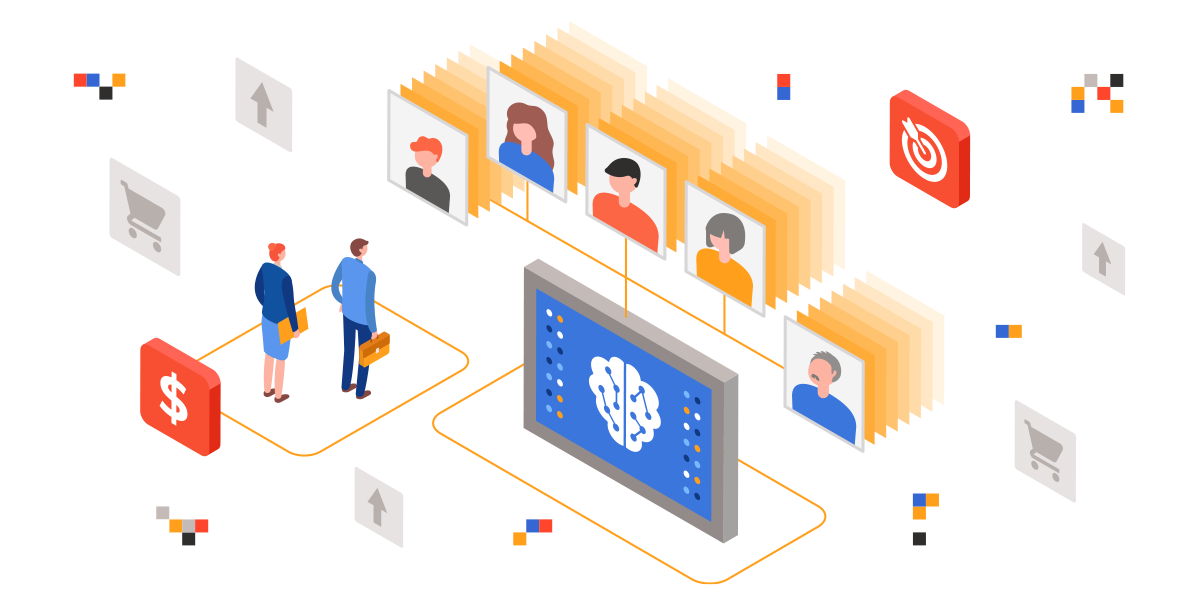

<center>
    <b>Figure1. Customers Segmentation
    </b>
</center>

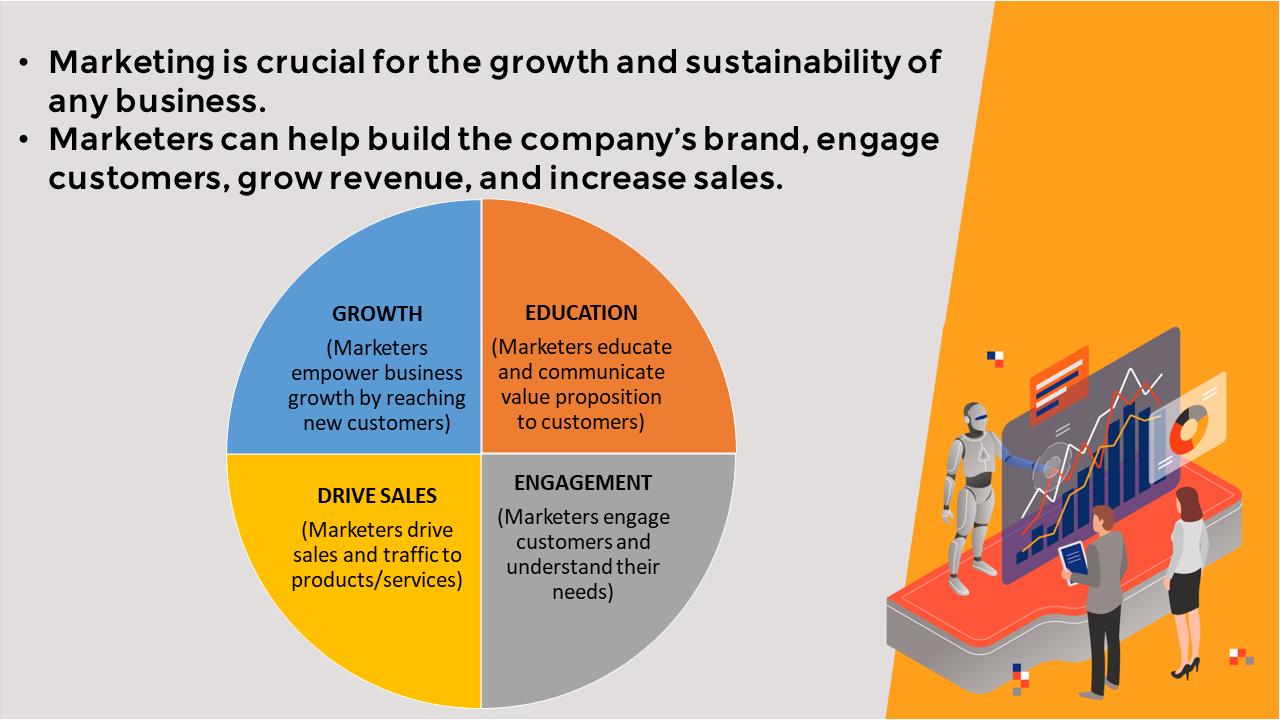

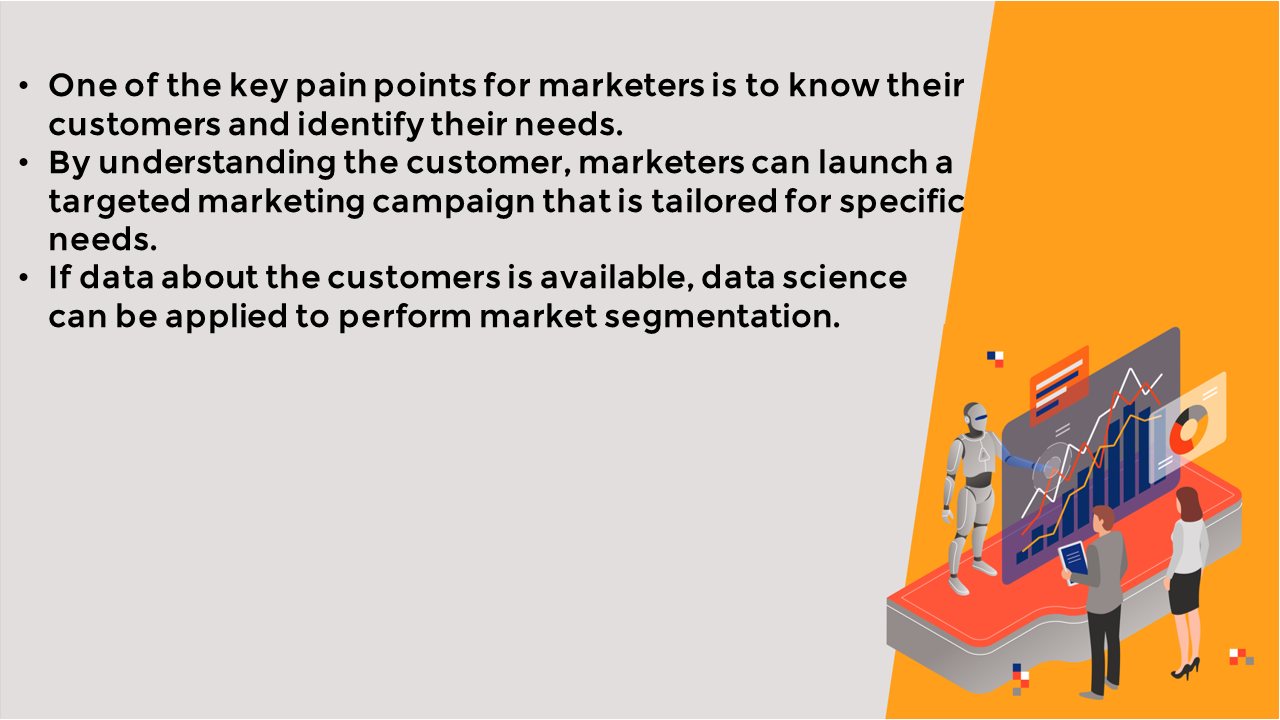

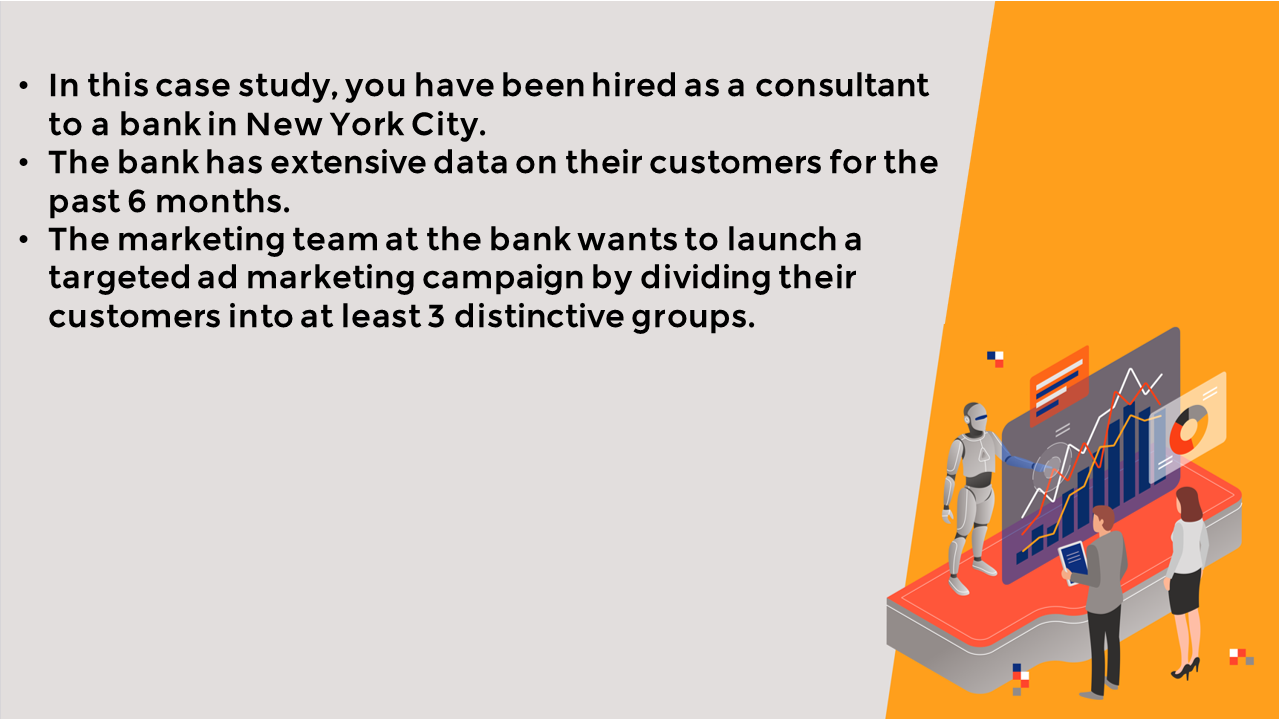

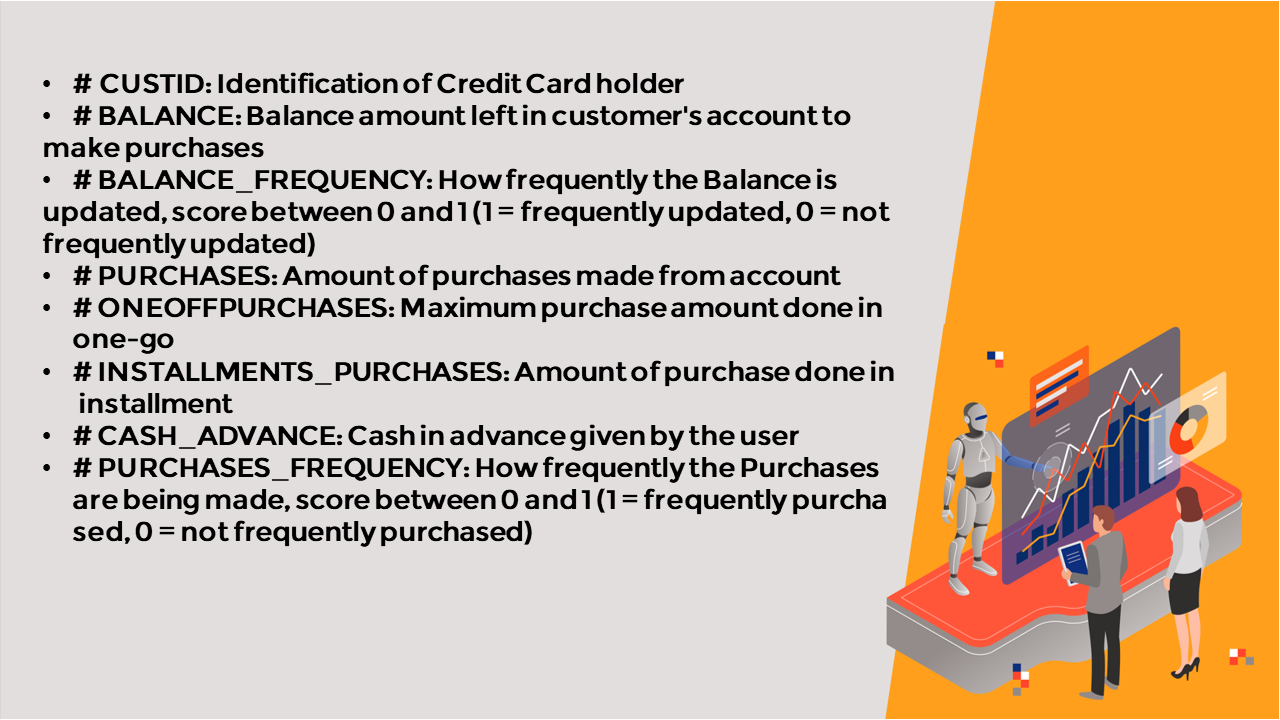

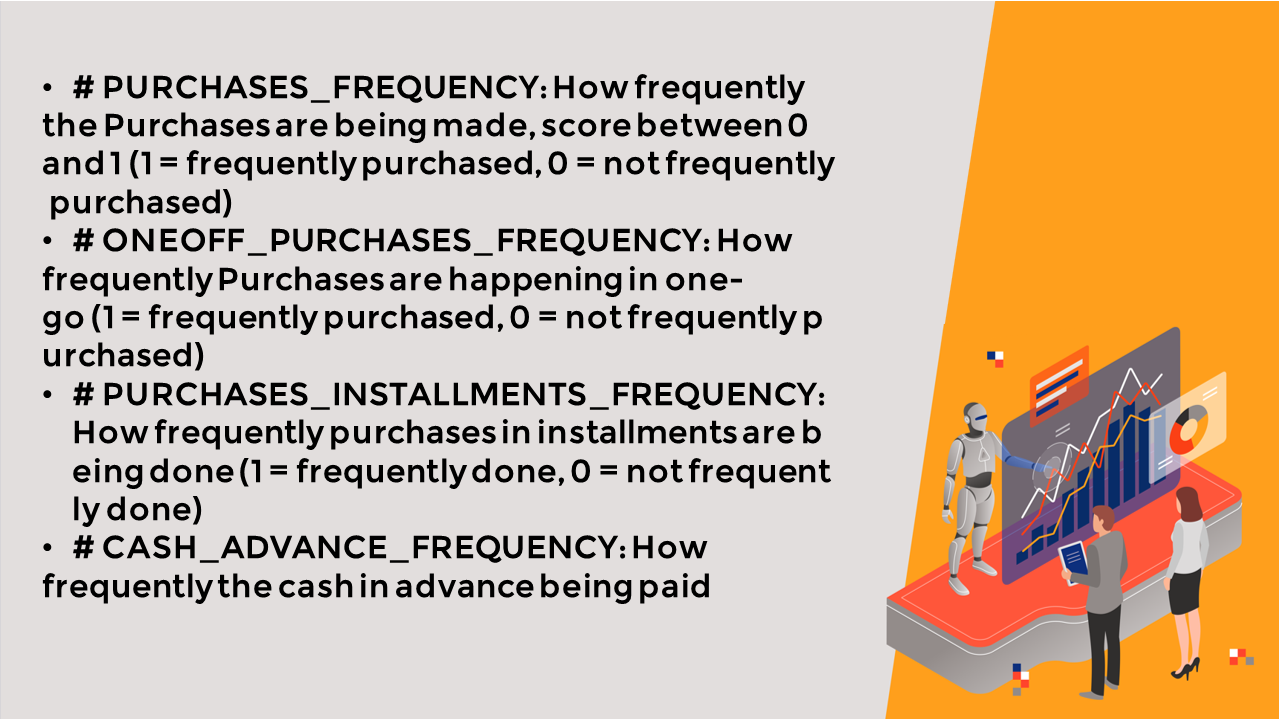

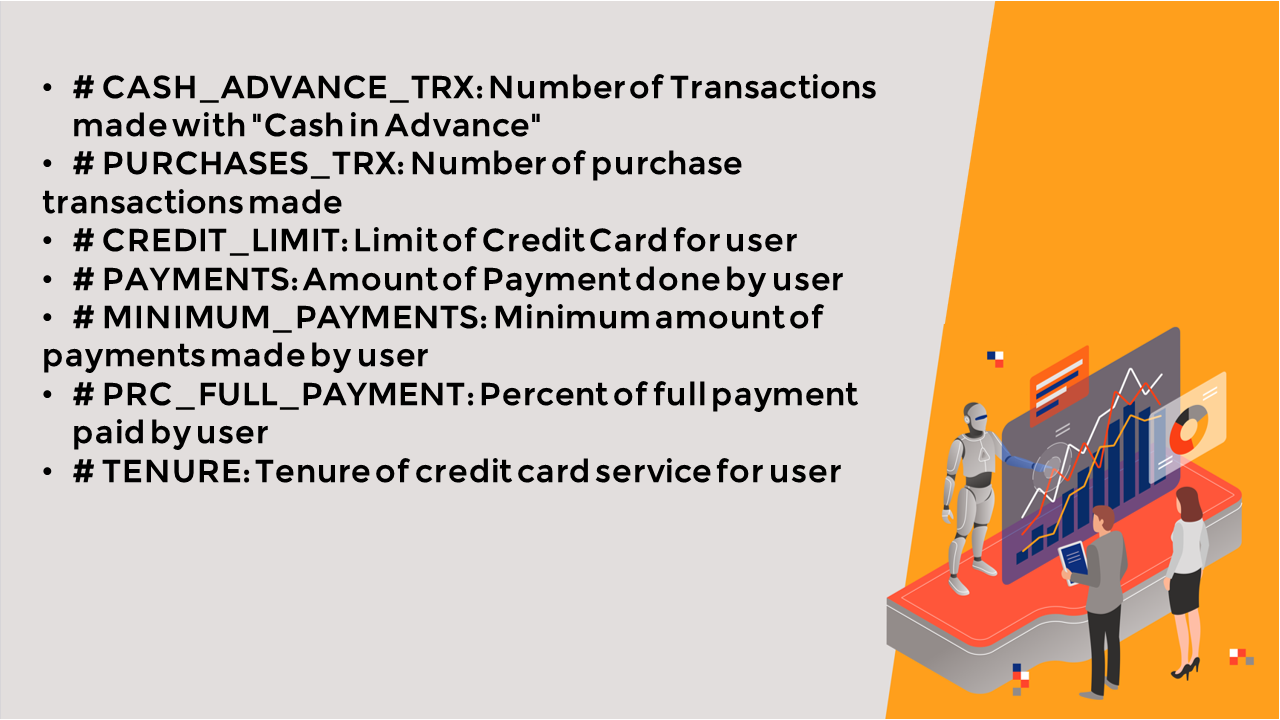

### **Data Source:** https://www.kaggle.com/arjunbhasin2013/ccdata

## TASK-2: IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# We need to mount our drive using the following commands:
# For more information regarding mounting, please check this out: https://stackflow.com/questions/46986398/import-data-into-google-colaboratory
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# we have to include the full link to the csv file containing our dataset
creditcard_df = pd.read_csv(r'C:\Users\mani2\Documents\Data Science For Business\datasets\Marketing_data.csv')

In [4]:
creditcard_df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

In [5]:
# All-columns headers:
creditcard_df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

### All columns details:
- **CUSTID:** Identification of Credit Card holder.
- **Balance:** Balance amount left in customer's account to make purchases.
- **BALANCE_FREQUENCY:** How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated).
- **PURCHASES:** Amount of purchases made from account.
- **ONEOFF_PURCHASES:** Maximum purchase amount done in one-go. 
- **INSTALLMENTS_PURCHASES:** Amount of purchase done in installment.
- **CASH_ADVANCE:** Cash in advance given by the user.
- **PURCHASES_FREQUENCY:** How frequently the purchases are being made, score betweem 0 and 1 (1 = frequently purchased, 0 = not frequently purchased).
- **ONEOFF_PURCHASES_FREQUENCY:** How frequently purchases are happening in one-go (1 = frequently purchases, 0 = not frequently purchased).
- **PURCHASES_INSTALLMENTS_FREQUENCY:** How frequently purcases in installments are being done (1 = frequently done, 0 = not frequently purchased).
- **CASH_ADVANCE_FREQUENCY:** How frequently the cash in advance being paid.
- **CASH_ADVANCE_TRX:** Number of Transactions made with 'Cash in Advance'.
- **PURCHASES_TRX:** Number of purchase transaction made.
- **CREDIT_LIMIT:** Limit of Credit Card for user.
- **PAYMENTS:** Amount of payment done by user.
- **MINIMUM_PAYMENTS:** Mininmum amount of payments made by user.
- **PRC_FULL_PAYMENT:** Percent of full payment paid by user.
- **TENURE:** Tenure of credit card service for user.

In [6]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

- 18 features with 8950 points

In [7]:
creditcard_df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

### Observations:
- Mean balance is 1564 dollars.
- Balance frequency is frequently updated on average ~0.9.
- Purchases average is ~1000 dollars.
- one off purchases frequency is around ~600 dollars.
- Average purchase frequency is around 0.5.
- Average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY and CASH_ADVANCE_FREQUENCY are generally low.
- Average credit limit ~4500.
- Percent of full payment is 15%.
- Average tenure is 11 years.

In [8]:
# Lets see who made one off purchase of $40761???
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] ==  40761.25]

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
550  C10574  11547.52001                1.0   49039.57          40761.25   

     INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
550                 8278.32    558.166886                  1.0   

     ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
550                         1.0                          0.916667   

     CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
550                0.083333                 1            101       22500.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
550  46930.59824       2974.069421              0.25      12

In [9]:
# Let check maximum cash advance value
creditcard_df['CASH_ADVANCE'].max()

47137.21176

In [10]:
# Lets see who made cash advance of $47137.21176
creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.21176]

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
2159  C12226  10905.05381                1.0     431.93             133.5   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
2159                  298.43   47137.21176             0.583333   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
2159                        0.25                               0.5   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
2159                     1.0               123             21       19600.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
2159  39048.59762       5394.173671               0.0      12

- We note that this customer has made 123 cash advance transactions
- Also he never paid credit card in full

## TASK-3: VISUALIZE AND EXPLORE DATASET

<Axes: >

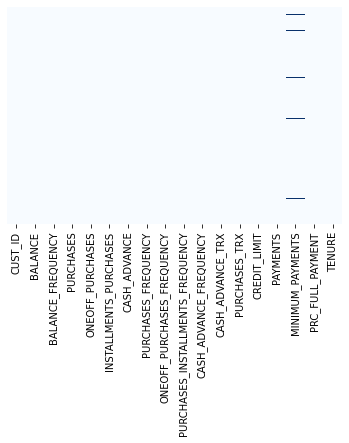

In [11]:
# Lets see if we have any missing data,
sns.heatmap(creditcard_df.isnull(), yticklabels= False, cbar= False, cmap= 'Blues')

In [12]:
# Also there might be very minimal null rows in some column which we can check as follows
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

- we note that there are 313 missing values in 'MINIMUM_PAYMENTS' and 1 missing value in 'CREDIT_LIMIT' column, which we need to handle by filling them with mean values.

In [13]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENTS'
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 
                  'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [14]:
# Fill up the missing elements with mean of the 'CREDIT_LIMIT'
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 
                  'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

<Axes: >

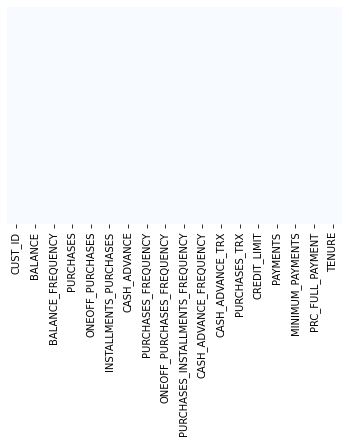

In [15]:
# lets again check if nulls are filled
sns.heatmap(creditcard_df.isnull(), yticklabels= False, cbar= False, cmap= "Blues")

In [16]:
# Lets see if we have any duplicated enteries in the data
creditcard_df.duplicated().sum()

0

In [17]:
# Lets drop the 'CUST_ID' since it has no meaning here
creditcard_df.drop('CUST_ID', axis= 1, inplace= True)

In [18]:
creditcard_df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000        864.206542          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [19]:
n = len(creditcard_df.columns)
n

17

In [20]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

- displot combines the matplotlib.hist function with seaborn kdeplot()
- KDE plot represents the kernel density estimate
- KDE is used for visualizing the probability density of a continuous variable
- KDE demonstrates the probability density at different values in a continuous variable

- Mean of balance is 1500 dollars
- 'BALANCE_FREQUENCY' for most customers is updated frequently ~1
- For 'PURCHASE_FRQUENCY', there are two distinct group of customers
- For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENTS_FREQUENCY' most users don't do one off purchases or installment purchases frequently
- Very small number of cutomers pay their balances in full 'PRC_FULL_PAYMENT' ~0
- Credit limit average is around 4500 dollar
- Most customers are ~11 years tenure

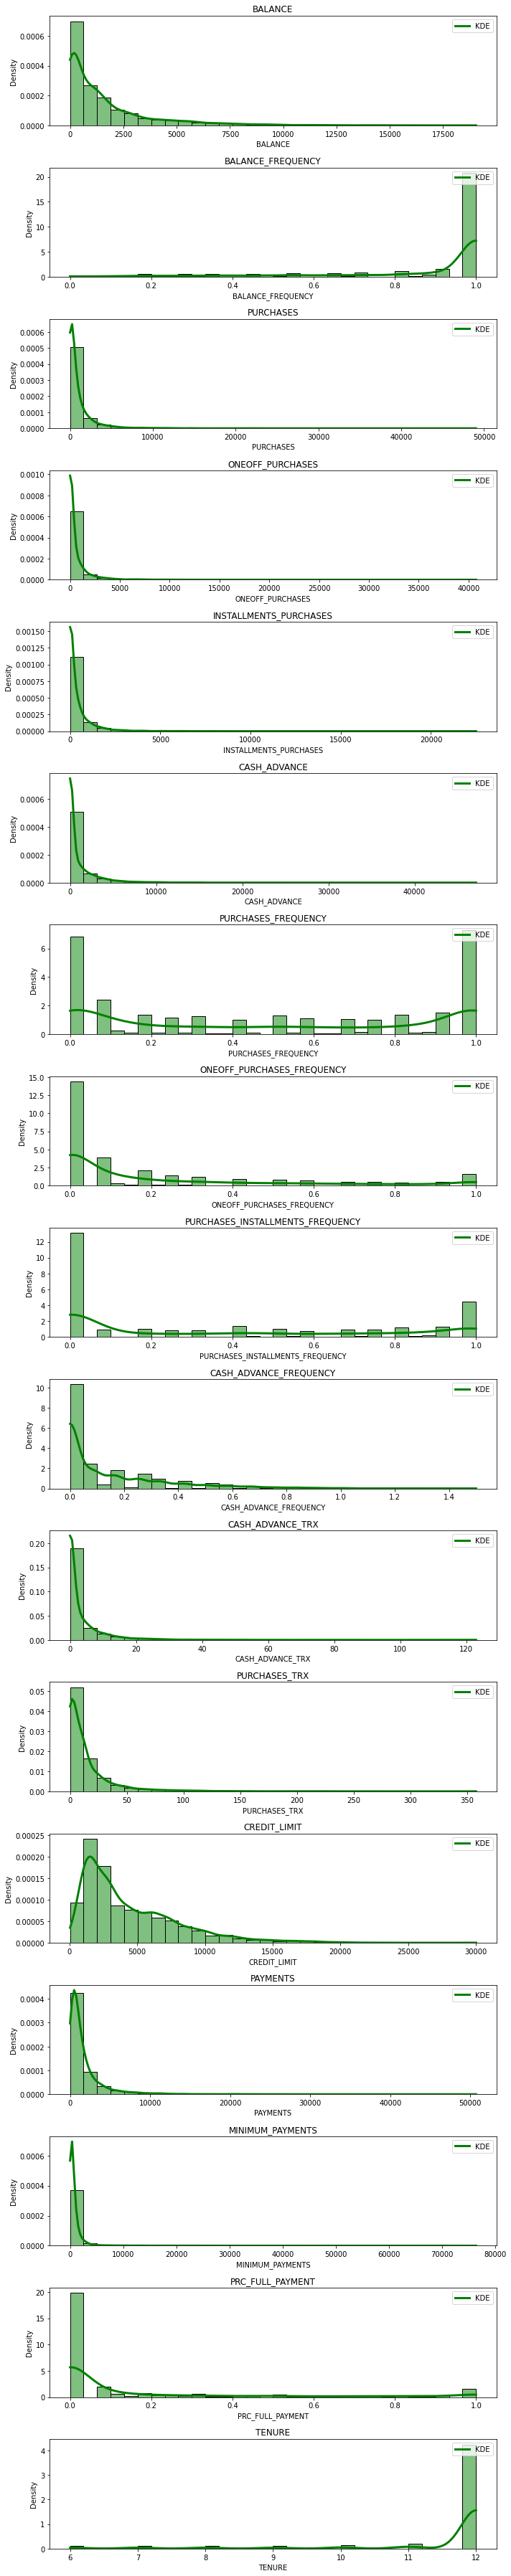

In [21]:
plt.figure(figsize=(10, 50))  

for i in range(len(creditcard_df.columns)):
    plt.subplot(17, 1, i + 1) 
    # Seaborn version 0.11.0, way to plot histplot using seabor distplot:
    '''sns.distplot(creditcard_df[creditcard_df.columns[i]], 
                 kde_kws={"color": "b", "lw": 3, "label": "KDE"}, 
                 hist_kws={"color": "g"})'''
    # Seaborn latest way to plot histplot in sns.displot:
    sns.histplot(creditcard_df[creditcard_df.columns[i]], 
                 kde=True,  
                 color="green",  
                 stat="density", 
                 bins=30,  
                 line_kws={"color": "blue", "lw": 3}) 
    plt.title(creditcard_df.columns[i])
    plt.legend(['KDE'], loc='upper right')

plt.tight_layout()
plt.show()

In [22]:
# sns.pairplot(creditcard_df)
# Correlation between 'PURCHASES' and 'ONEOFF_PURCHASES' & 'INSTALLMENT_PURCHASES'
# Trend between 'PURCHASES' and 'CREDIT_LIIMT' & 'PAYMENTS'

correlations = creditcard_df.corr()
correlations

BALANCE  BALANCE_FREQUENCY  PURCHASES  \
BALANCE                           1.000000           0.322412   0.181261   
BALANCE_FREQUENCY                 0.322412           1.000000   0.133674   
PURCHASES                         0.181261           0.133674   1.000000   
ONEOFF_PURCHASES                  0.164350           0.104323   0.916845   
INSTALLMENTS_PURCHASES            0.126469           0.124292   0.679896   
CASH_ADVANCE                      0.496692           0.099388  -0.051474   
PURCHASES_FREQUENCY              -0.077944           0.229715   0.393017   
ONEOFF_PURCHASES_FREQUENCY        0.073166           0.202415   0.498430   
PURCHASES_INSTALLMENTS_FREQUENCY -0.063186           0.176079   0.315567   
CASH_ADVANCE_FREQUENCY            0.449218           0.191873  -0.120143   
CASH_ADVANCE_TRX                  0.385152           0.141555  -0.067175   
PURCHASES_TRX                     0.154338           0.189626   0.689561   
CREDIT_LIMIT                      0.531267           0.095795   0.356959   
PAYMENTS                          0.322802           0.065008   0.603264   
MINIMUM_PAYMENTS                  0.394282           0.114249   0.093515   
PRC_FULL_PAYMENT                 -0.318959          -0.095082   0.180379   
TENURE                            0.072692           0.119776   0.086288   

                                  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
BALANCE                                   0.164350                0.126469   
BALANCE_FREQUENCY                         0.104323                0.124292   
PURCHASES                                 0.916845                0.679896   
ONEOFF_PURCHASES                          1.000000                0.330622   
INSTALLMENTS_PURCHASES                    0.330622                1.000000   
CASH_ADVANCE                             -0.031326               -0.064244   
PURCHASES_FREQUENCY                       0.264937                0.442418   
ONEOFF_PURCHASES_FREQUENCY                0.524891                0.214042   
PURCHASES_INSTALLMENTS_FREQUENCY          0.127729                0.511351   
CASH_ADVANCE_FREQUENCY                   -0.082628               -0.132318   
CASH_ADVANCE_TRX                         -0.046212               -0.073999   
PURCHASES_TRX                             0.545523                0.628108   
CREDIT_LIMIT                              0.319721                0.256496   
PAYMENTS                                  0.567292                0.384084   
MINIMUM_PAYMENTS                          0.048597                0.131687   
PRC_FULL_PAYMENT                          0.132763                0.182569   
TENURE                                    0.064150                0.086143   

                                  CASH_ADVANCE  PURCHASES_FREQUENCY  \
BALANCE                               0.496692            -0.077944   
BALANCE_FREQUENCY                     0.099388             0.229715   
PURCHASES                            -0.051474             0.393017   
ONEOFF_PURCHASES                     -0.031326             0.264937   
INSTALLMENTS_PURCHASES               -0.064244             0.442418   
CASH_ADVANCE                          1.000000            -0.215507   
PURCHASES_FREQUENCY                  -0.215507             1.000000   
ONEOFF_PURCHASES_FREQUENCY           -0.086754             0.501343   
PURCHASES_INSTALLMENTS_FREQUENCY     -0.177070             0.862934   
CASH_ADVANCE_FREQUENCY                0.628522            -0.308478   
CASH_ADVANCE_TRX                      0.656498            -0.203478   
PURCHASES_TRX                        -0.075850             0.568430   
CREDIT_LIMIT                          0.303983             0.119778   
PAYMENTS                              0.453238             0.103464   
MINIMUM_PAYMENTS                      0.139223             0.002976   
PRC_FULL_PAYMENT                     -0.152935             0.305802   
TENURE                               -0.068312        

<Axes: >

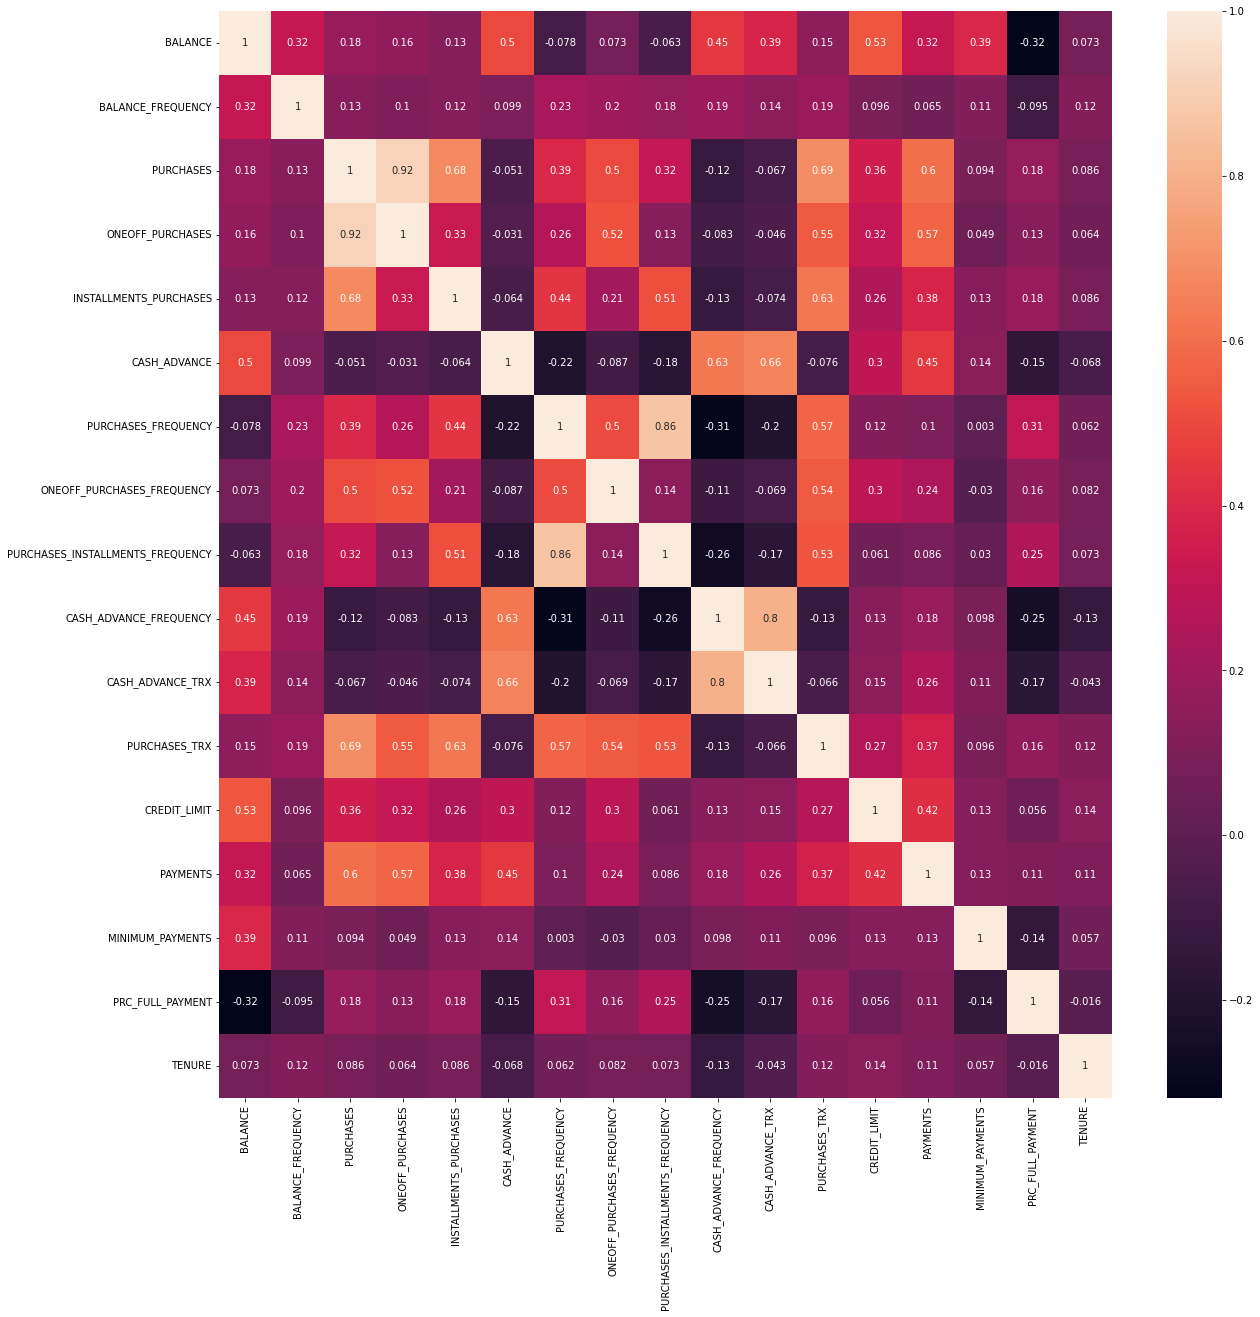

In [23]:
# plotting in heatmap
f, ax = plt.subplots(figsize= (20,20))
sns.heatmap(correlations, annot= True)

### Observations:
- 'PURCHASES' have high correlation between one-off purchases, 'installment purchases', 'purchases transactions', 'credit limit', and 'payments'.
- strong positive correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'.

## TASK-4: UNDERSTAND THE THEORY AND INTUITION BEHIND K-MEANS

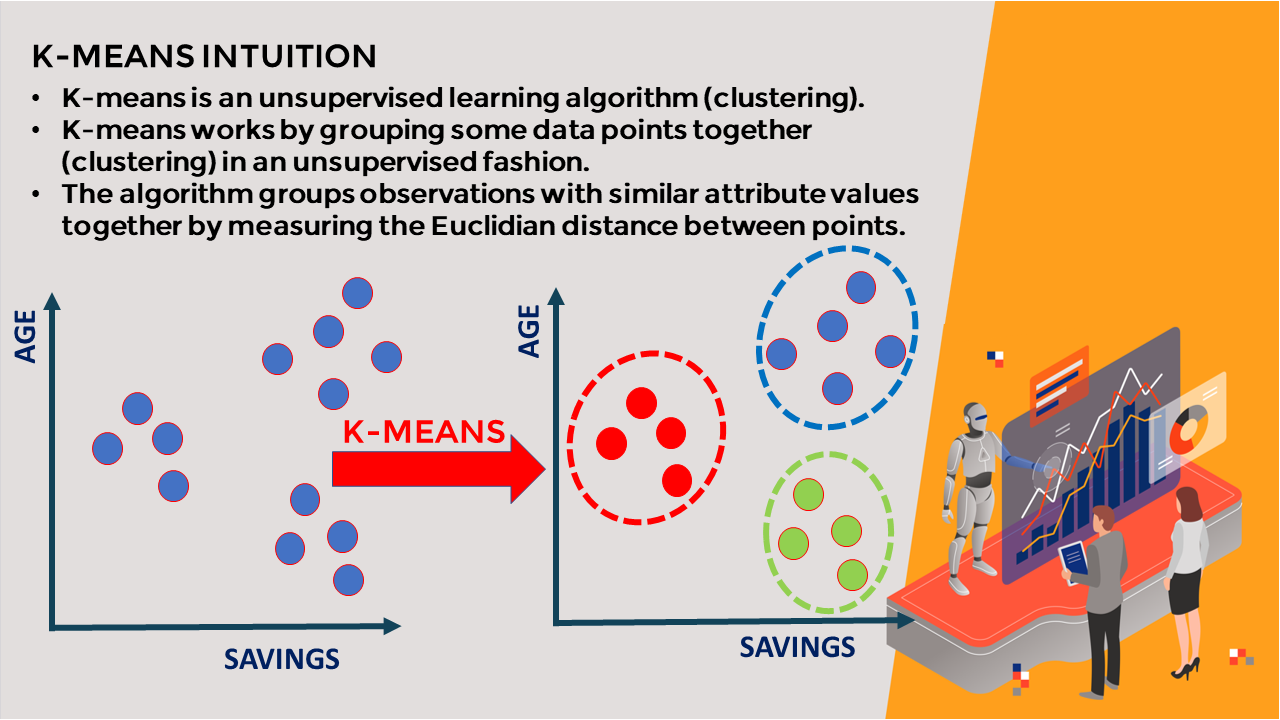

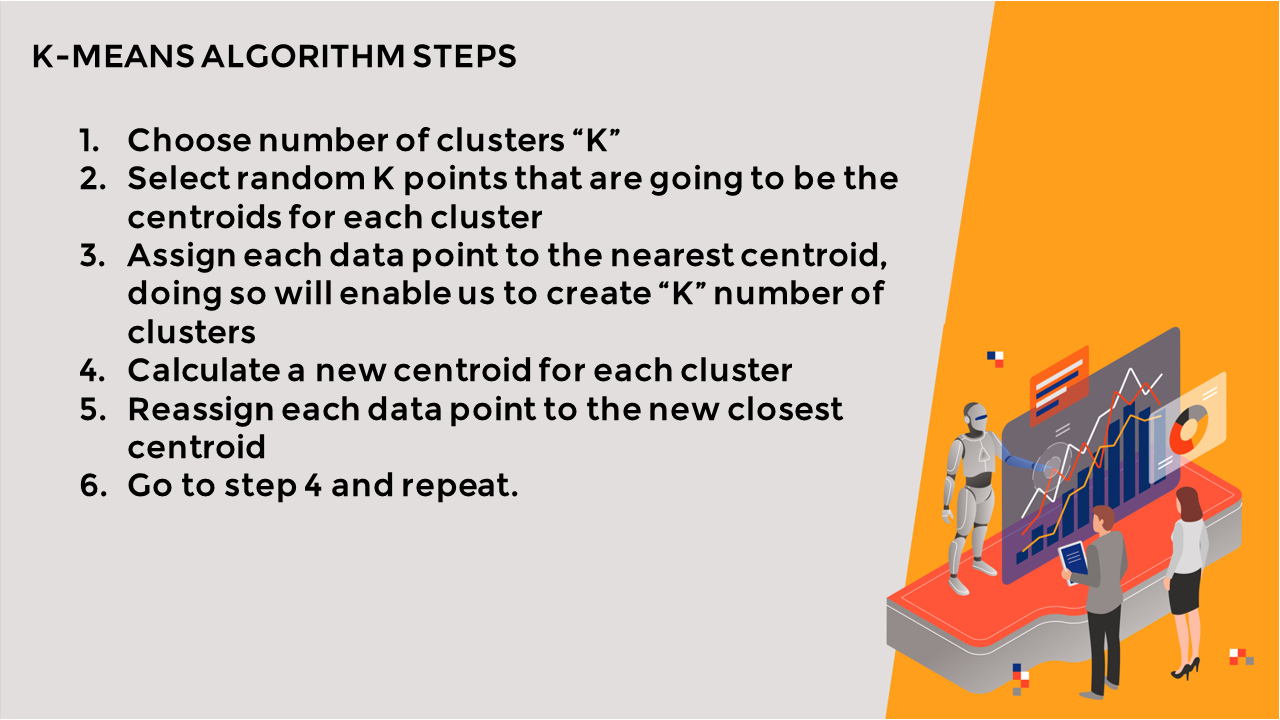

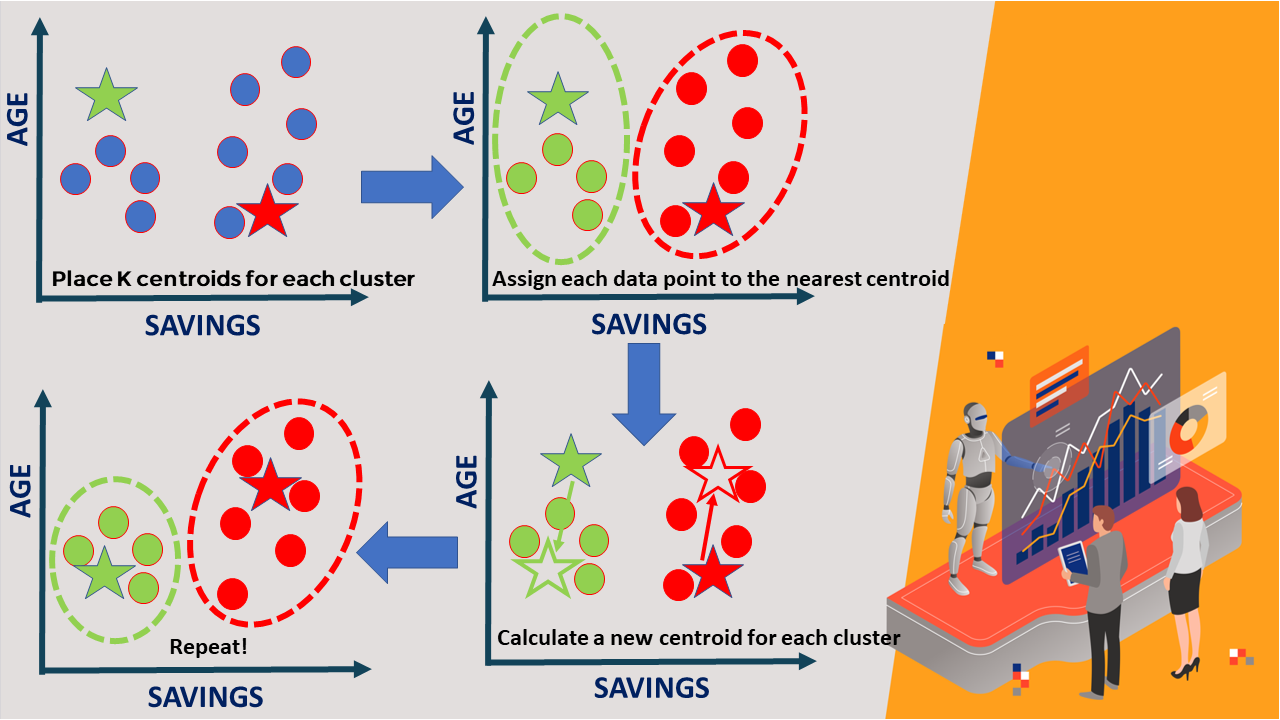

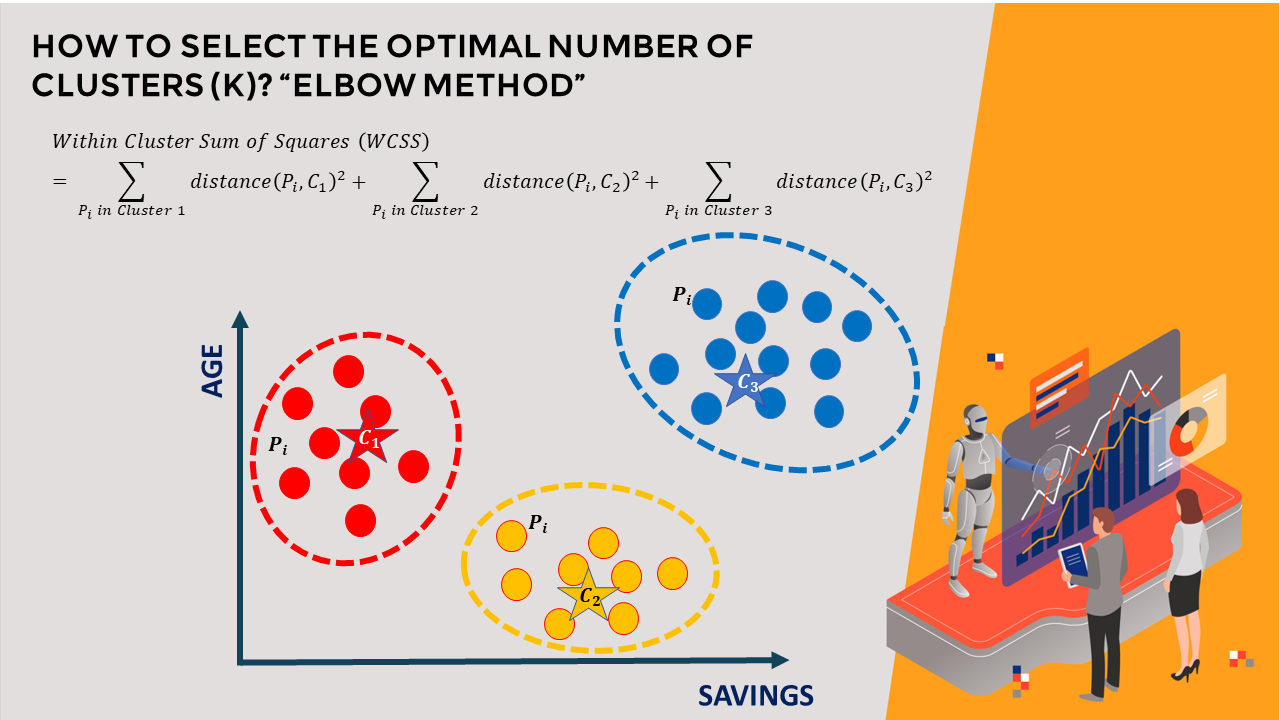

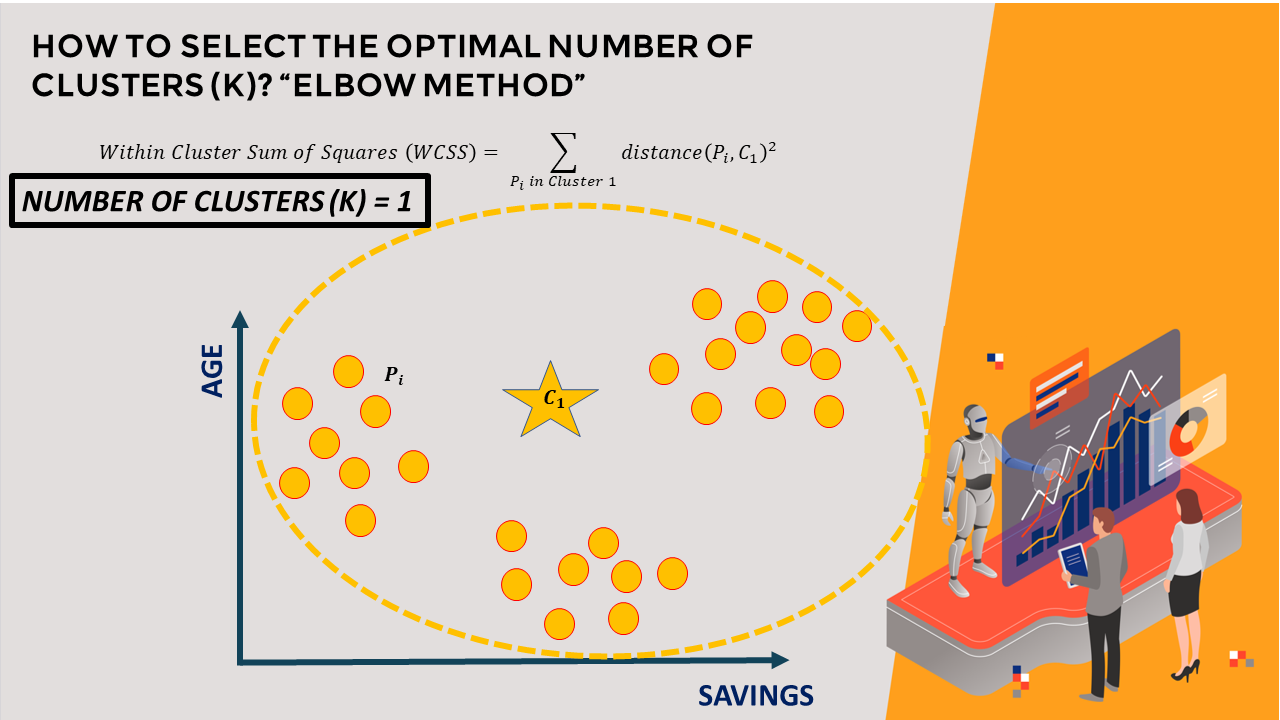

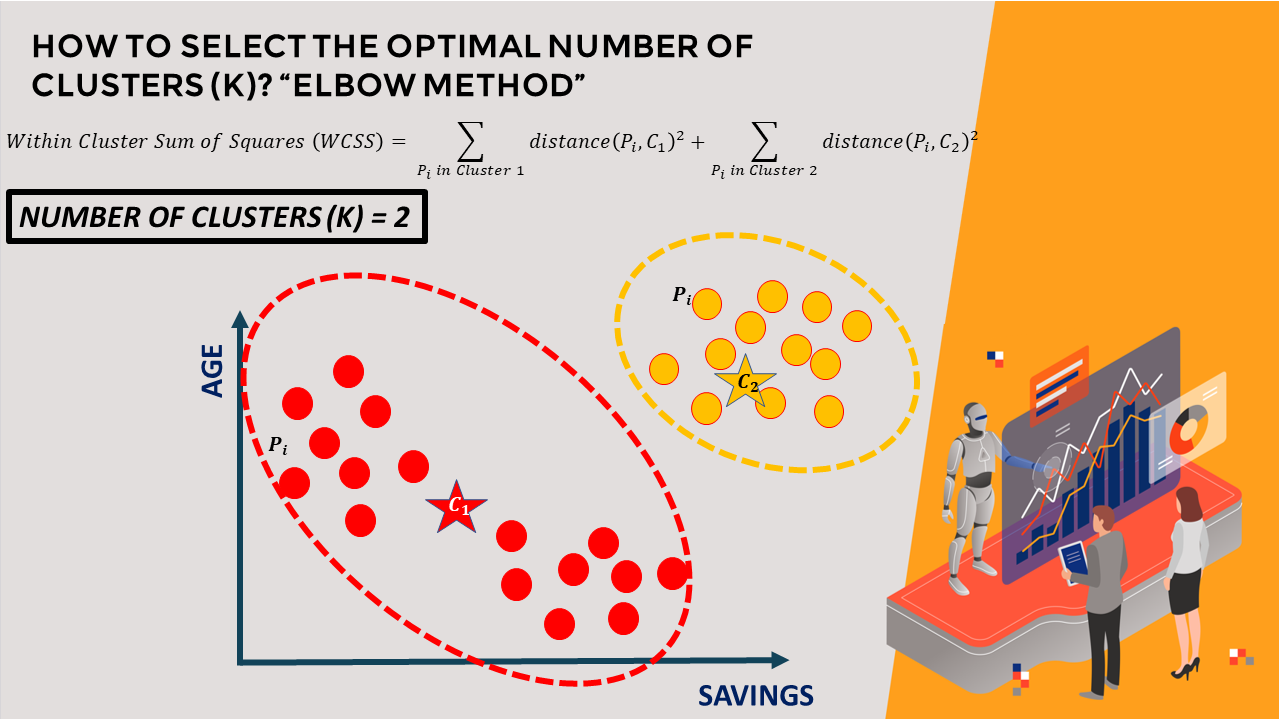

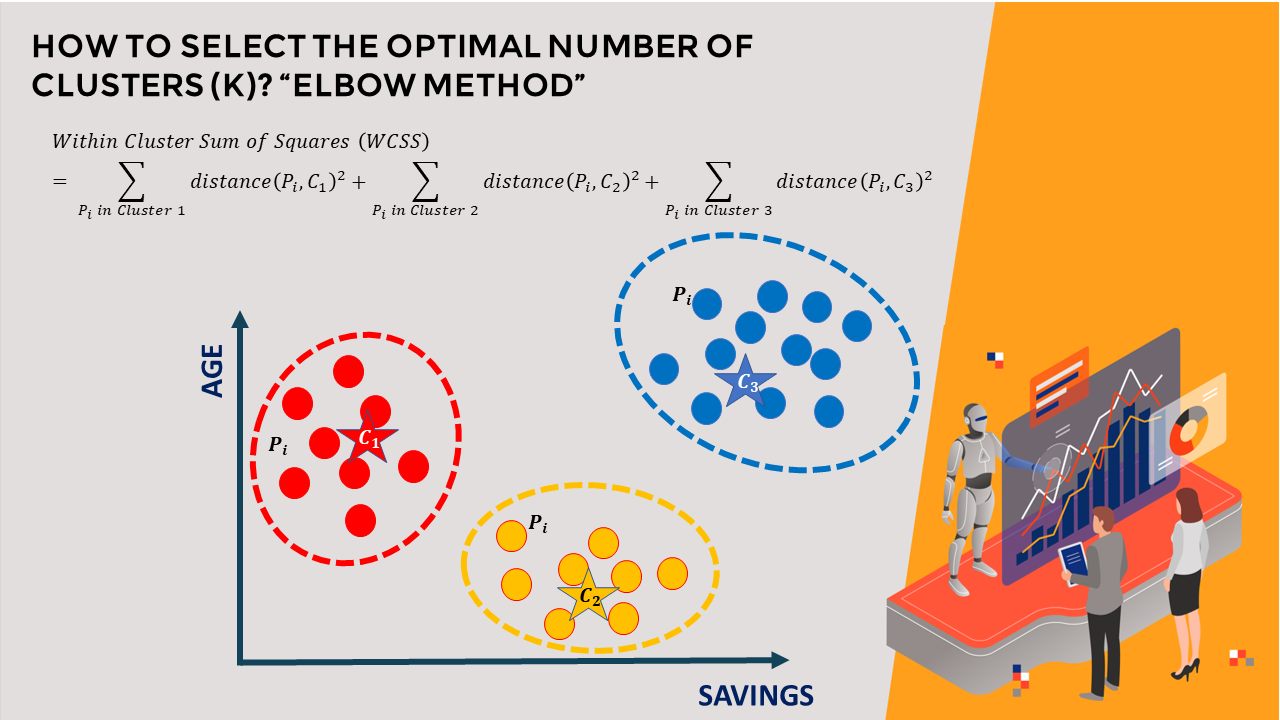

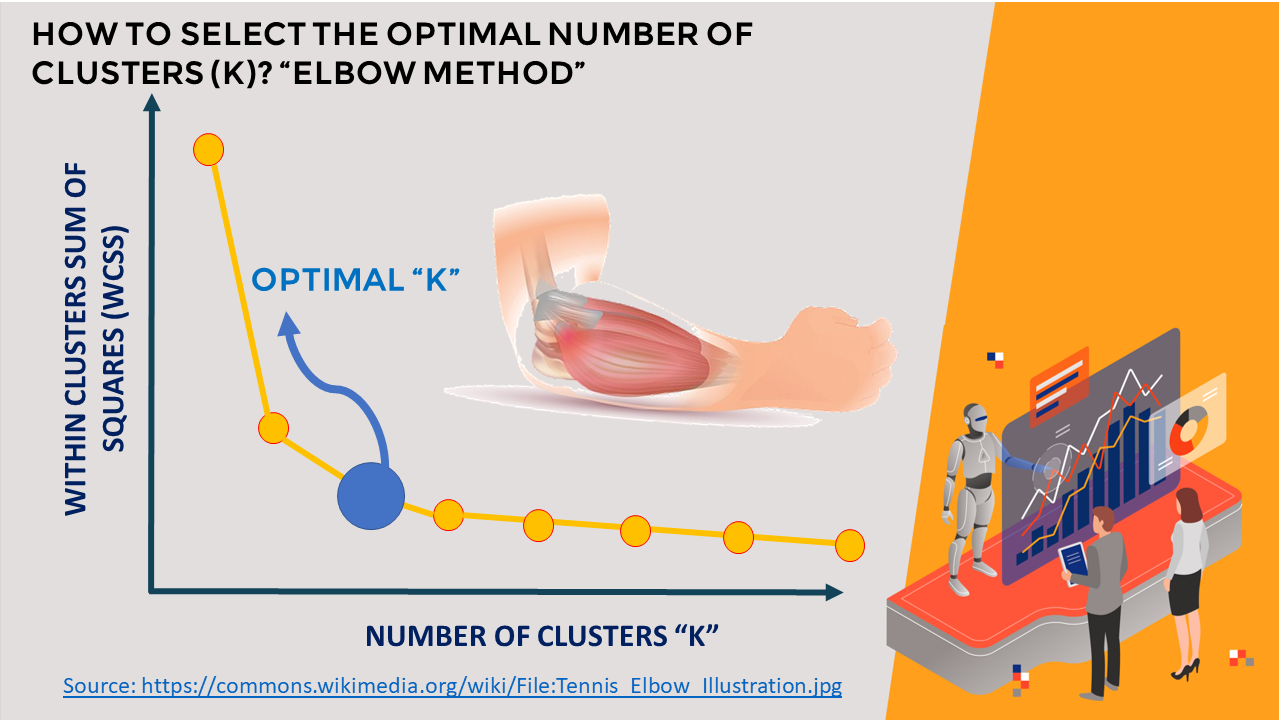

## TASK-5: FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD

- The Elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset.
- If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best.
- Source:
1. https://en.wikipedia.org/wiki/Elbow_method_(clustering)
2. https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [24]:
# Let's scale the data first
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [25]:
creditcard_df_scaled.shape

(8950, 17)

In [26]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

C:\Users\mani2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mani2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mani2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mani2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\

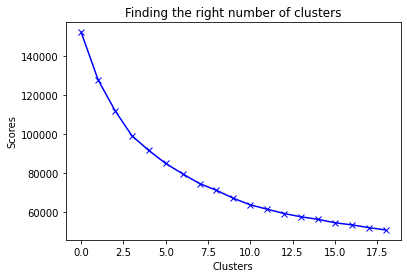

In [27]:
scores_1 = []
range_values = range(1, 20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(creditcard_df_scaled)
    scores_1.append(kmeans.inertia_)
    
plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores')
plt.show()

- From this we can observe that, 4th cluster seems to be forming the elbow of the curve.
- However, the values does not reduce linearly until the 8th cluster.
- Lets choose the number of clusters to be 7.

## TASK-6: APPLY K-MEANS METHOD

In [28]:
kmeans = KMeans(8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

C:\Users\mani2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [29]:
kmeans.cluster_centers_.shape

(8, 17)

In [30]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns= [creditcard_df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY  PURCHASES ONEOFF_PURCHASES  \
0 -0.364675          0.333430  -0.037084        -0.244240   
1  0.019135          0.403238  -0.361845        -0.247042   
2 -0.701229         -2.144116  -0.311099        -0.235720   
3  1.698325          0.393098  -0.215463        -0.154529   
4  1.923051          0.337717  11.212042        10.600367   
5  0.901817          0.466986   2.270963         1.756936   
6 -0.165253          0.392196   0.453349         0.593167   
7 -0.336050         -0.347078  -0.289267        -0.215966   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0               0.360838    -0.363568            0.991629   
1              -0.401605    -0.086839           -0.866849   
2              -0.302414    -0.321905           -0.556586   
3              -0.225632     2.025668           -0.471452   
4               7.033118     0.419625            1.046983   
5               2.141920    -0.195512            1.158629   
6              -0.017967    -0.333914            0.943302   
7              -0.286835     0.068284           -0.203078   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                  -0.386928                         1.206940   
1                  -0.410607                        -0.757865   
2                  -0.444989                        -0.439730   
3                  -0.210500                        -0.409161   
4                   1.915501                         0.981334   
5                   1.583889                         1.226198   
6                   1.878357                         0.089014   
7                  -0.288661                        -0.224549   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0              -0.475246        -0.361111      0.188020    -0.260435   
1               0.115204        -0.020981     -0.486628    -0.305456   
2              -0.520844        -0.376103     -0.419790    -0.177161   
3               1.920837         1.941432     -0.263115     1.040171   
4              -0.258912         0.061229      5.362438     3.044064   
5              -0.312181        -0.212097      2.781452     1.238947   
6              -0.407665        -0.323378      0.523732     0.373578   
7               0.308663         0.000996     -0.388117    -0.567159   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0 -0.216561        -0.032442         0.314683  0.257535  
1 -0.248386        -0.008590        -0.456525  0.271866  
2 -0.202048        -0.256658         0.281550  0.199199  
3  0.828342         0.557352        -0.392330  0.071341  
4  8.098975         1.120318         1.110132  0.310863  
5  1.290295         0.441655         0.304778  0.334182  
6  0.086557        -0.162605         0.406347  0.261047  
7 -0.392680        -0.209145         0.014011 -3.203733

In [31]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns= [creditcard_df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY     PURCHASES ONEOFF_PURCHASES  \
0   805.434029          0.956257    923.973297       187.048203   
1  1604.302726          0.972794    230.117781       182.398265   
2   104.925267          0.369349    338.537483       201.190254   
3  5099.393953          0.970392    542.864477       335.950907   
4  5567.142164          0.957273  24957.905000     18186.875667   
5  3441.530986          0.987896   5855.151608      3508.591111   
6  1220.514994          0.970178   1971.792676      1576.972447   
7   865.015978          0.795051    385.181720       233.977974   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0             737.368630   216.451679            0.888339   
1              47.901056   796.765070            0.142442   
2             137.598754   303.821813            0.266966   
3             207.031791  5226.790667            0.301134   
4            6771.029333  1858.844605            0.910556   
5            2347.978936   568.874079            0.955365   
6             394.820228   278.637458            0.868943   
7             151.686061  1122.064941            0.408846   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.087030                         0.844106   
1                   0.079966                         0.063242   
2                   0.069709                         0.189677   
3                   0.139661                         0.201826   
4                   0.773889                         0.754444   
5                   0.674962                         0.851760   
6                   0.762808                         0.399814   
7                   0.116344                         0.275196   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX  CREDIT_LIMIT  \
0               0.040043         0.784508     19.383317   3546.881928   
1               0.158198         3.105649      2.614087   3383.076547   
2               0.030918         0.682203      4.275424   3849.863936   
3               0.519523        16.497674      8.169767   8279.016913   
4               0.083333         3.666667    148.000000  15570.000000   
5               0.072674         1.801418     83.846336   9002.245863   
6               0.053566         1.042009     27.727854   5853.677875   
7               0.196911         3.255627      5.062701   2430.891398   

       PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT     TENURE  
0   1106.220084       788.601343         0.245754  11.861966  
1   1014.090763       844.187585         0.020189  11.881145  
2   1148.234177       266.075424         0.236063  11.783898  
3   4131.114001      2163.092995         0.038965  11.612791  
4  25178.882690      3475.059479         0.478409  11.933333  
5   5468.421612      1893.464949         0.242857  11.964539  
6   1983.717894       485.262318         0.272564  11.866667  
7    596.373827       376.802926         0.157813   7.229904

- **First Customers cluster (Transactors):** Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance (104 dollars) and cash advance (303 dollars), Percentage of full payment = 23%
- **Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector):** highest balance (5000 dollars) and cash advance (~5000 dollars), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
- **Third customer cluster (VIP/Prime):** high credit limit 16K dollars and highest percentage of full payment, target for increase credit limit and increase spending habits
- **Fourth customer cluster (low tenure):** these are customers with low tenure (7 years), low balance 

In [32]:
labels.shape    # Labels associated to each data point

(8950,)

In [33]:
labels.max()

7

In [34]:
labels.min()

0

In [35]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans

C:\Users\mani2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 3, 6, ..., 7, 7, 7])

In [36]:
# concatenate the clusters lables to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis= 1)
creditcard_df_cluster.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0   201.802084        139.509787          0.000000      12        1  
1  4103.032597       1072.340217          0.222222      12        3  
2   622.066742        627.284787          0.000000      12        6  
3     0.000000        864.206542          0.000000      12        1  
4   678.334763        244.791237          0.000000      12        1

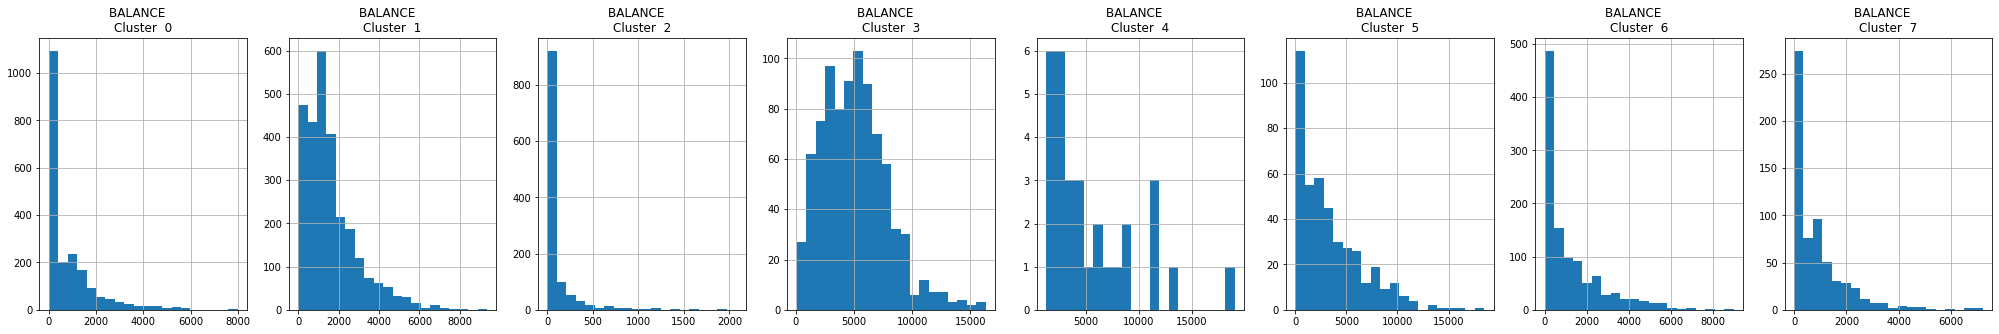

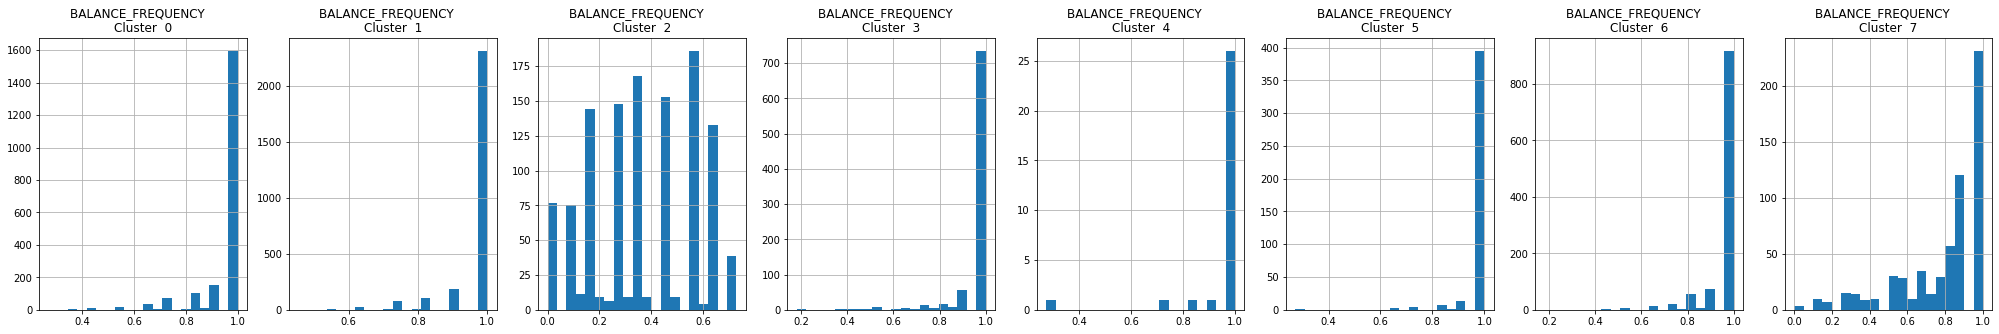

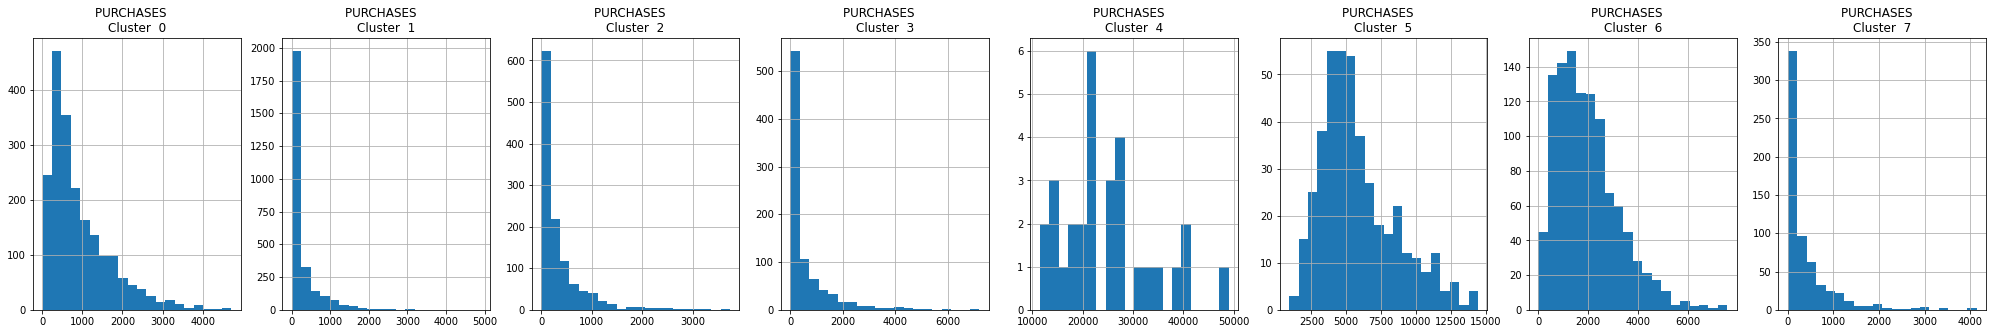

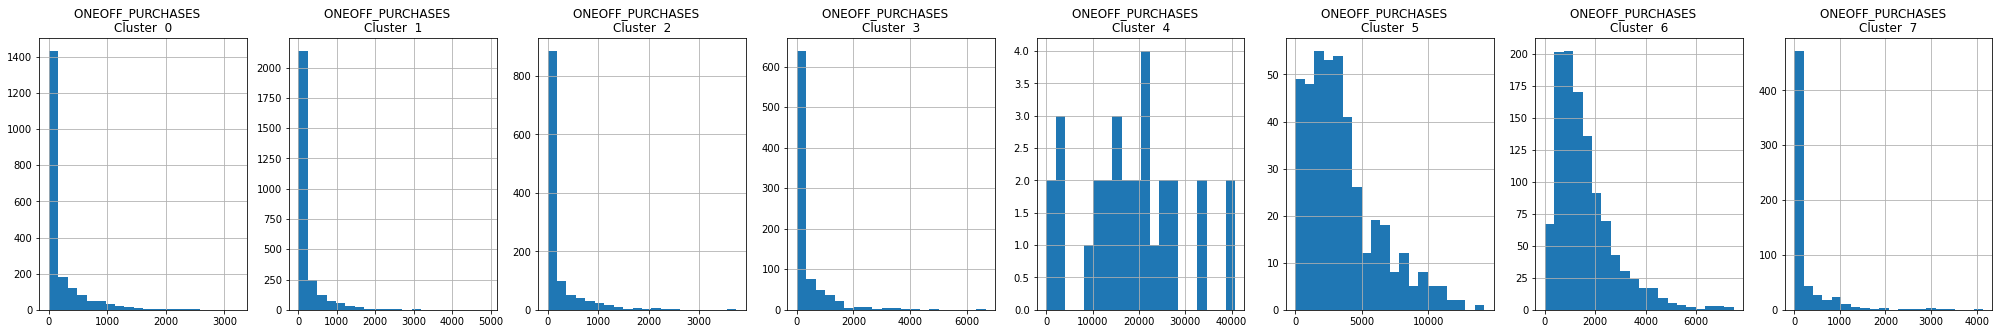

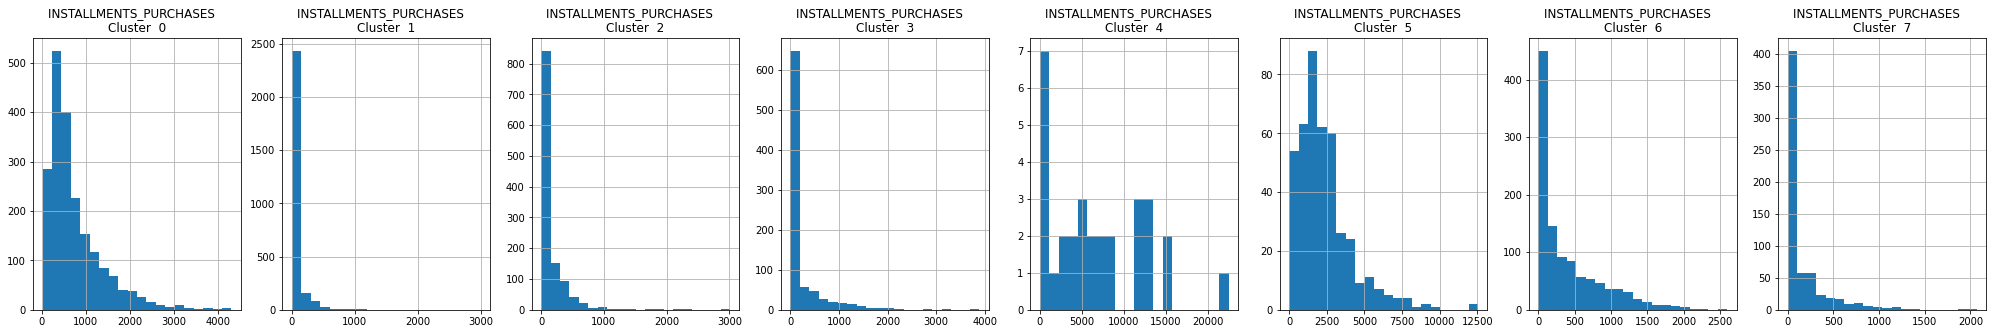

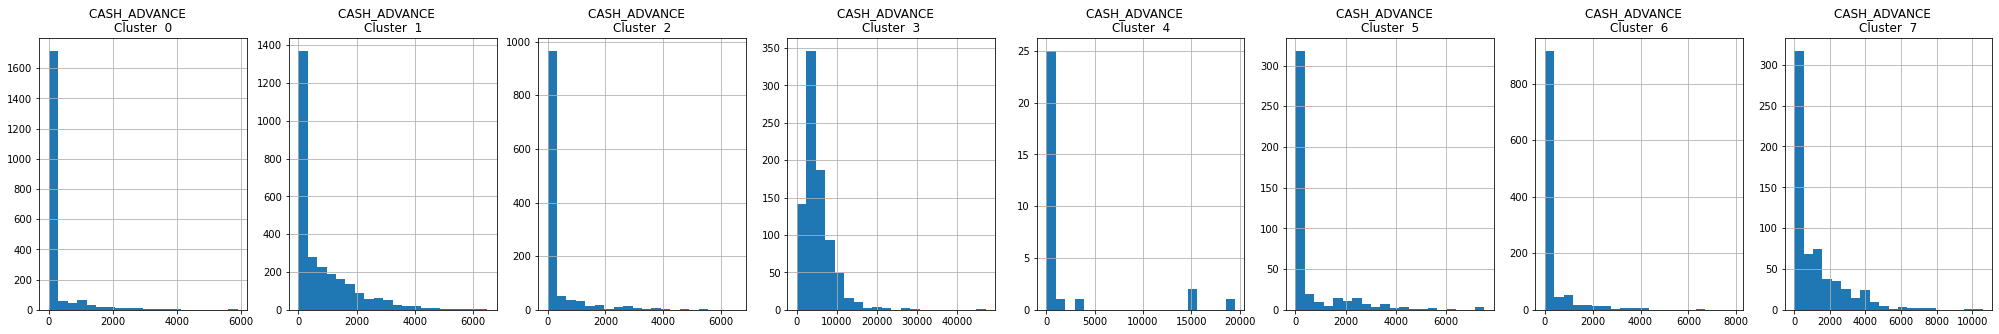

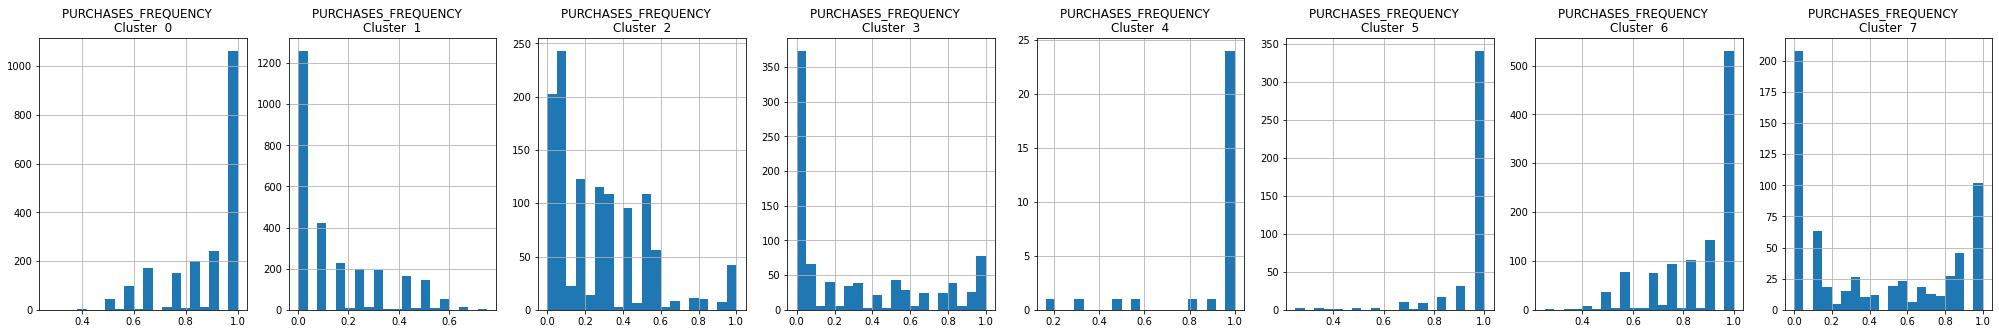

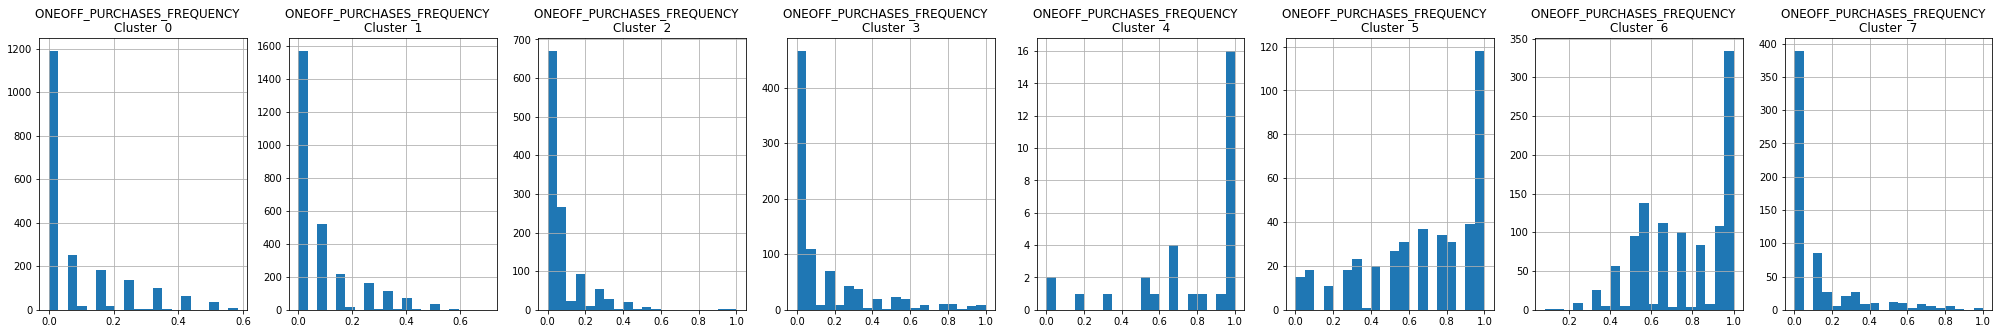

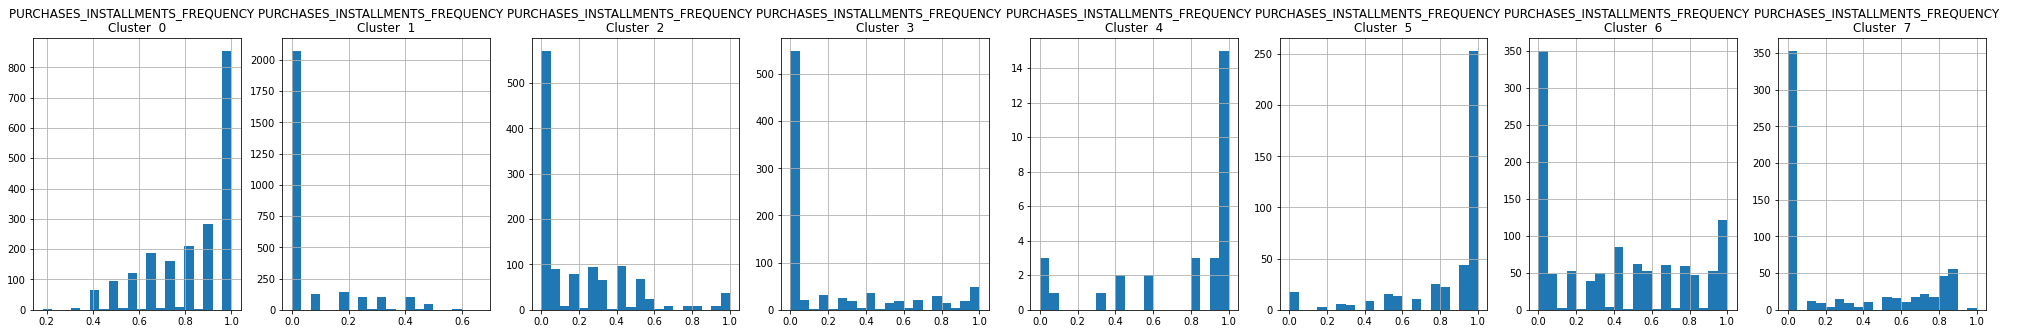

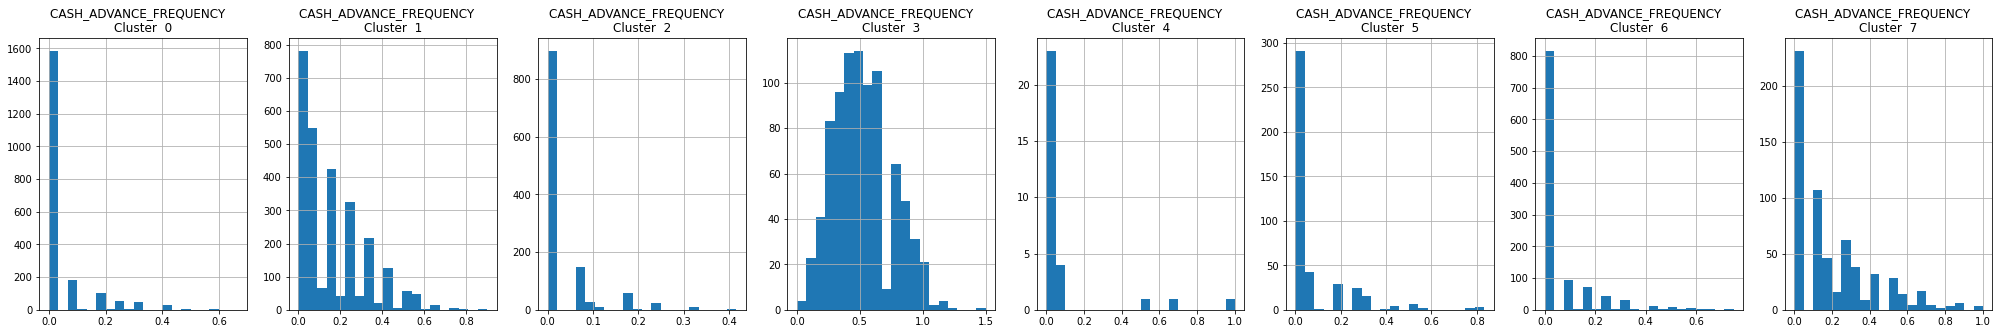

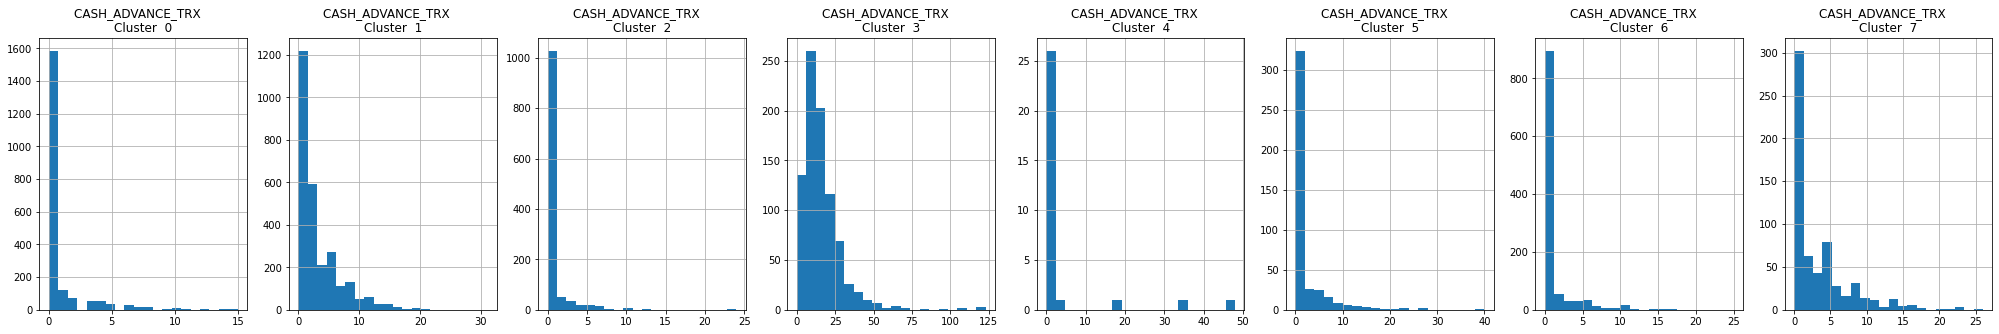

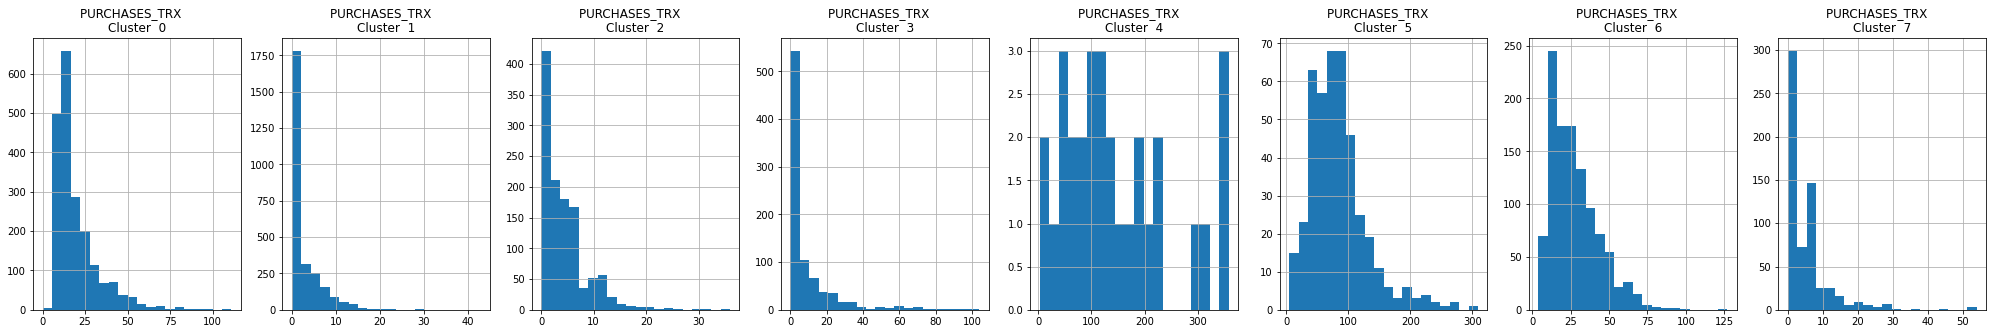

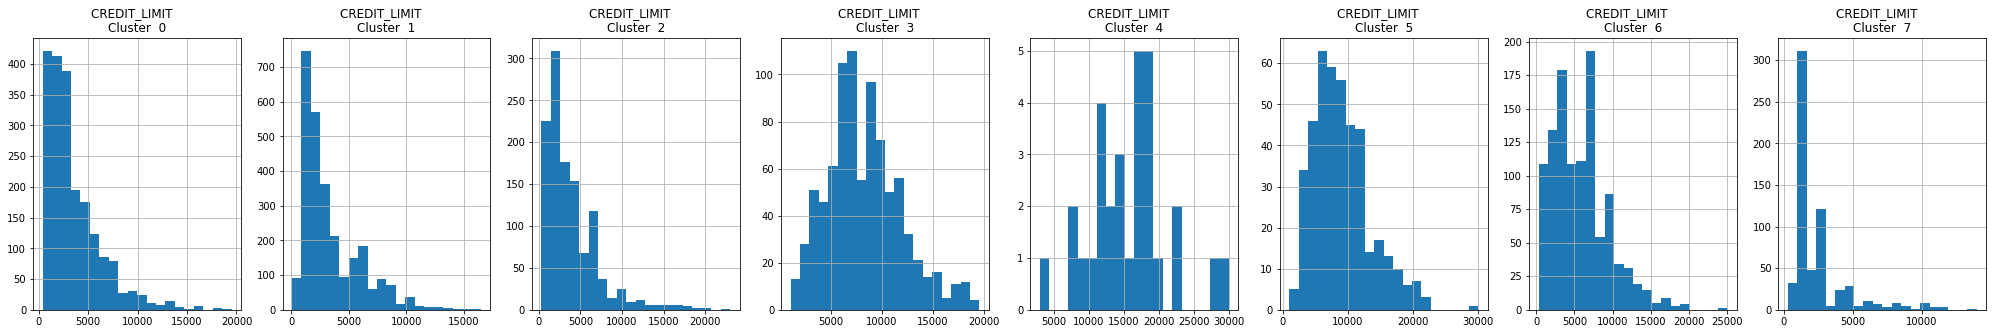

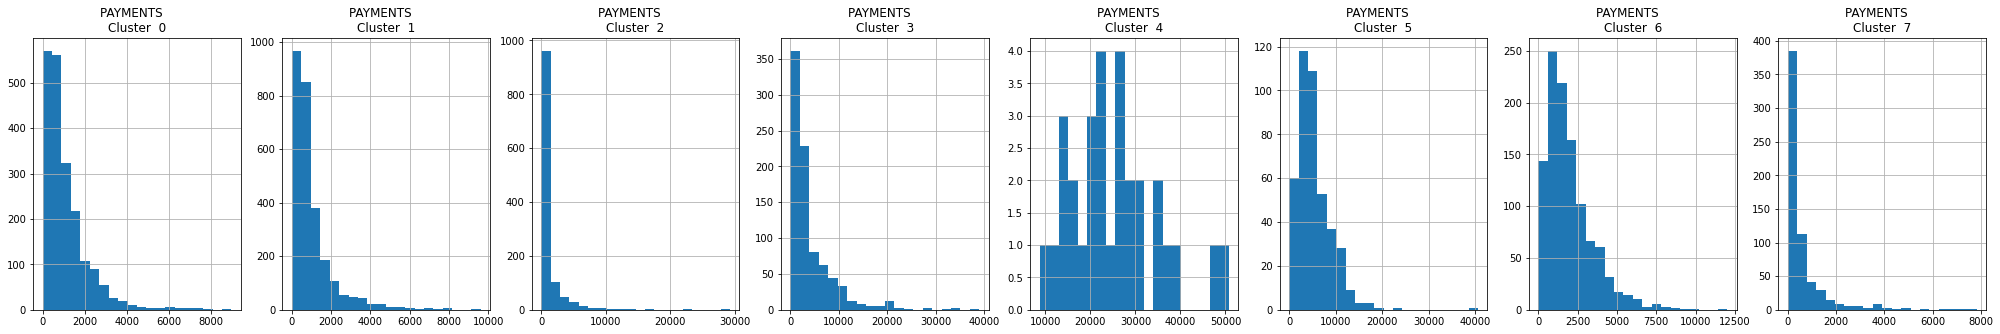

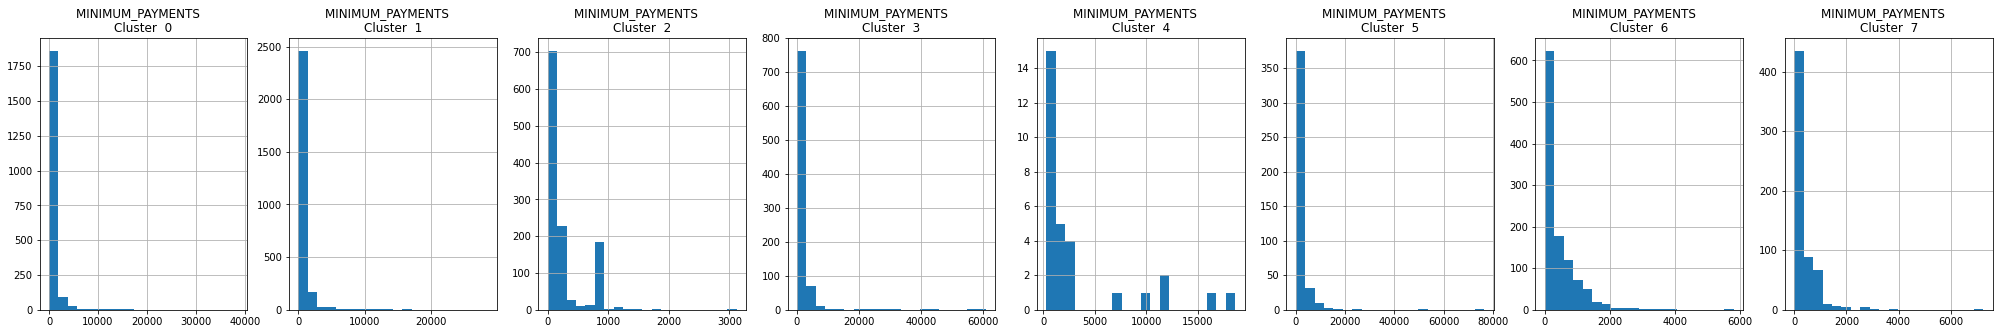

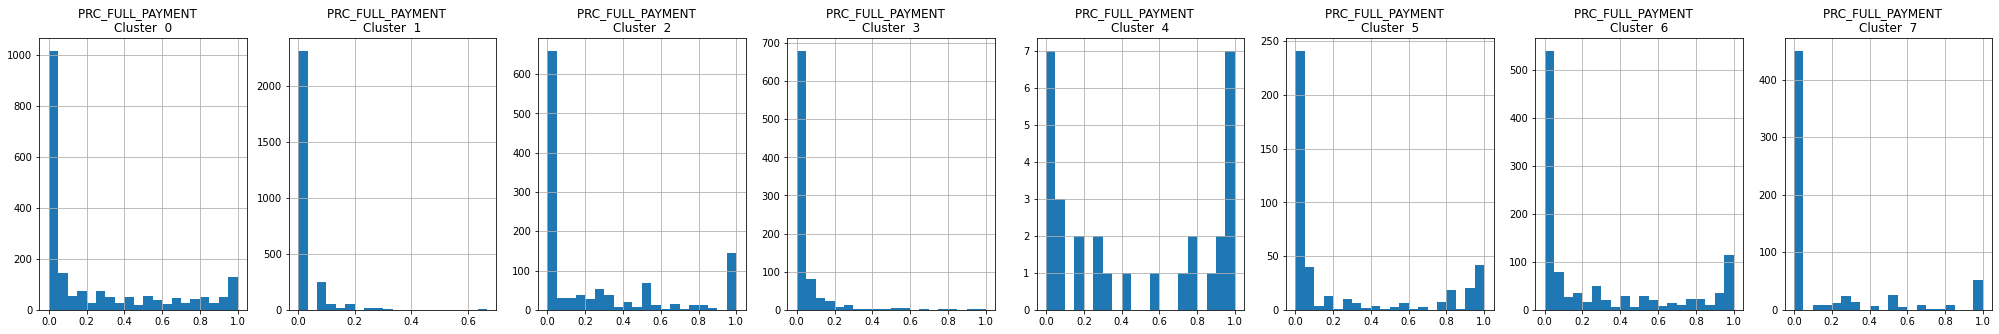

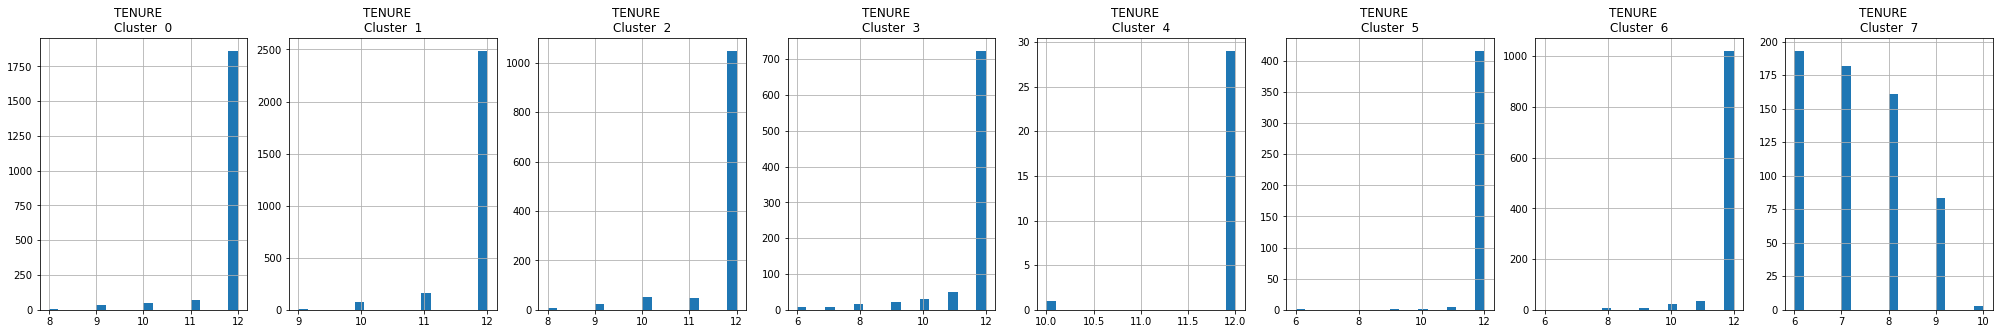

In [37]:
# Plot the histogram of various clusters
for i in creditcard_df.columns:
    plt.figure(figsize= (35,5))
    for j in range(8):
        plt.subplot(1,8, j+1)
        cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
        cluster[i].hist(bins = 20)
        plt.title('{}   \nCluster  {}'.format(i,j))
        
    plt.show()

## TASK-7: APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS

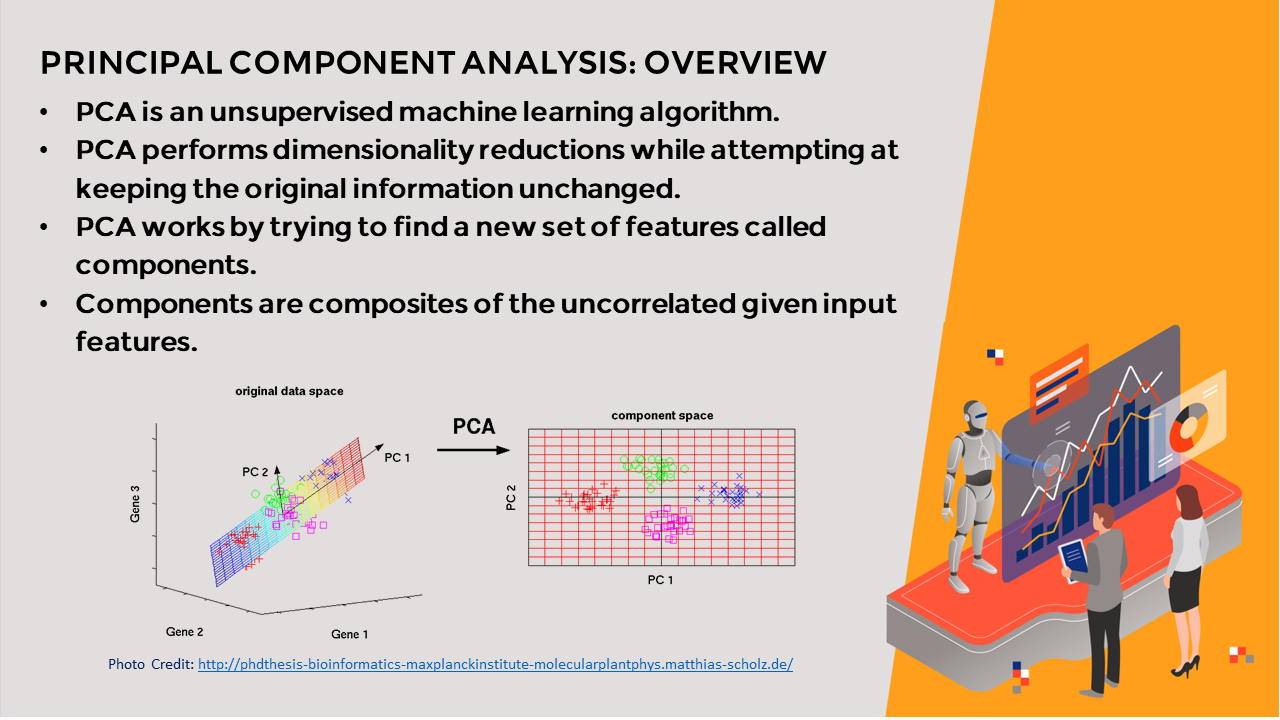

In [38]:
# obtain the principal components
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68221949, -1.07645268],
       [-1.13828942,  2.50647355],
       [ 0.96968502, -0.38351495],
       ...,
       [-0.92620448, -1.81078611],
       [-2.3365537 , -0.65796702],
       [-0.55642387, -0.40046165]])

In [39]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns= ['pca1', 'pca2'])
pca_df.head()

pca1      pca2
0 -1.682219 -1.076453
1 -1.138289  2.506474
2  0.969685 -0.383515
3 -0.873629  0.043158
4 -1.599433 -0.688580

In [40]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis= 1)
pca_df.head()

pca1      pca2  cluster
0 -1.682219 -1.076453        1
1 -1.138289  2.506474        3
2  0.969685 -0.383515        6
3 -0.873629  0.043158        1
4 -1.599433 -0.688580        1

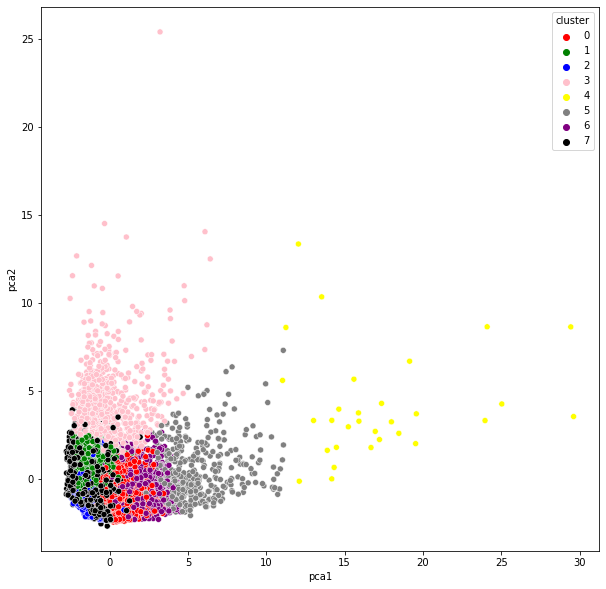

In [41]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue="cluster",
                    data= pca_df, palette= ['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black'])
plt.show()

## TASK-8: UNDERSTAND THE THEORY AND INTUITION BEHIND AUTOENCODERS

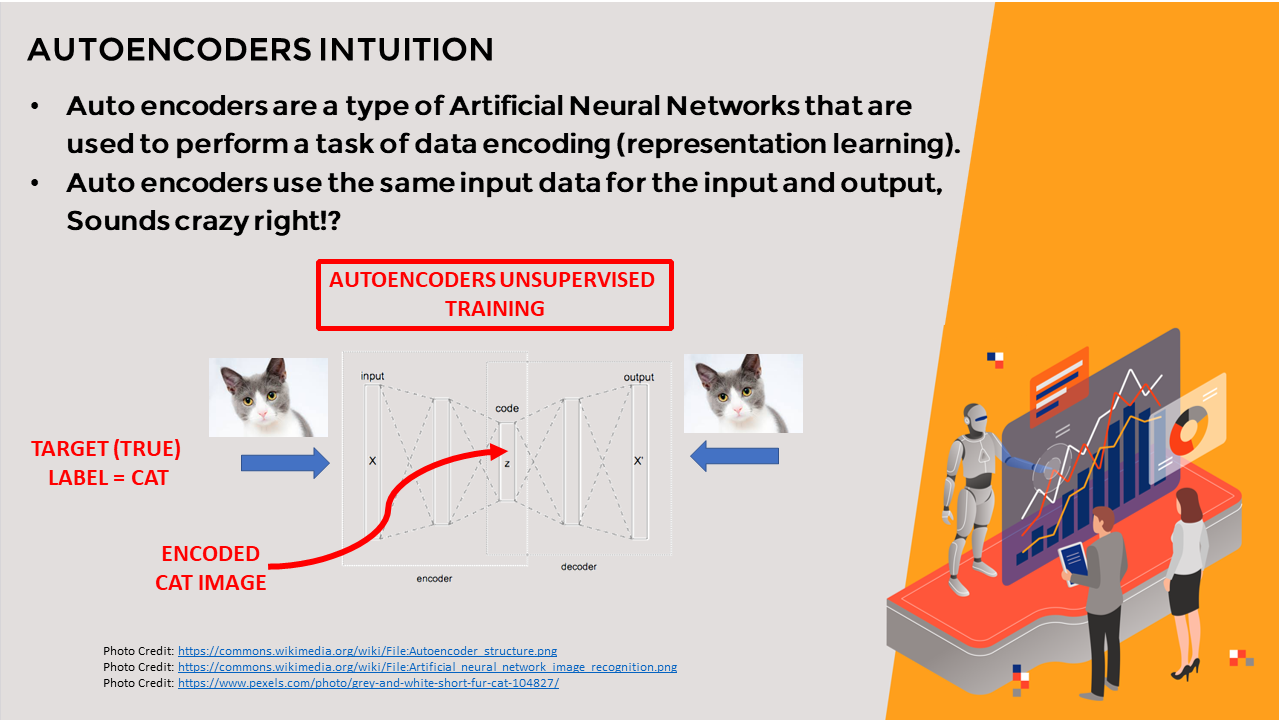

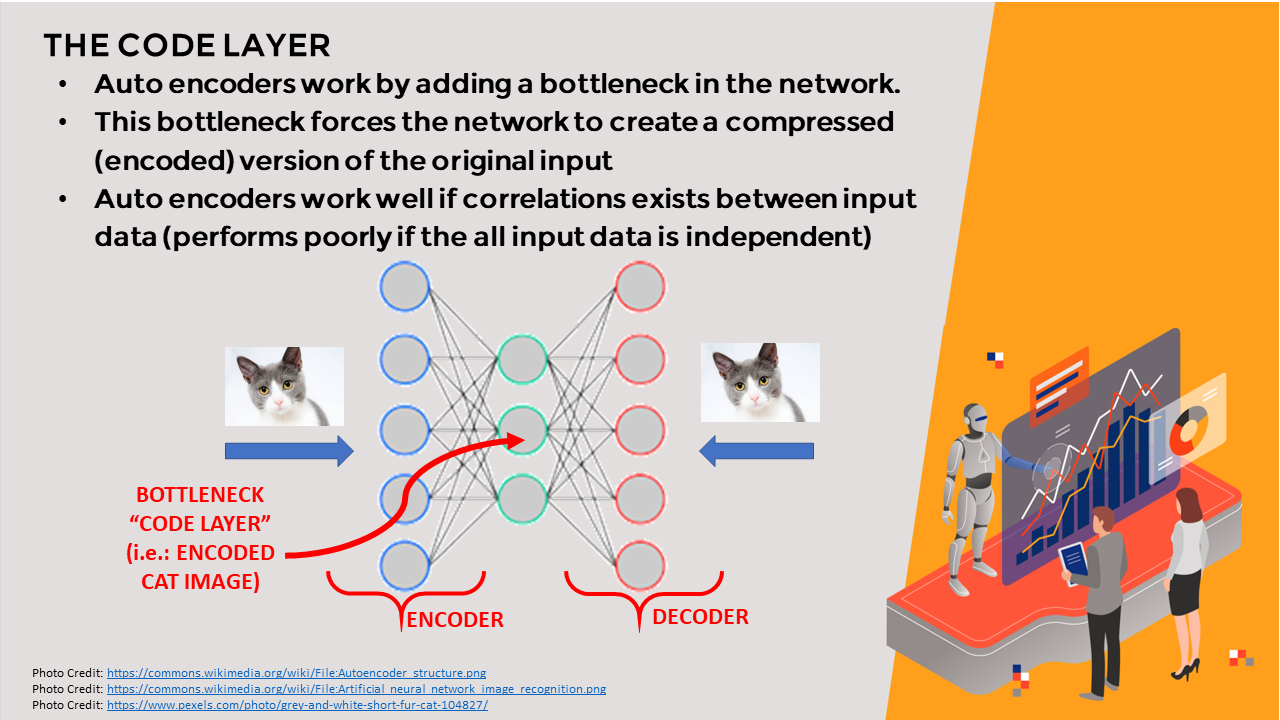

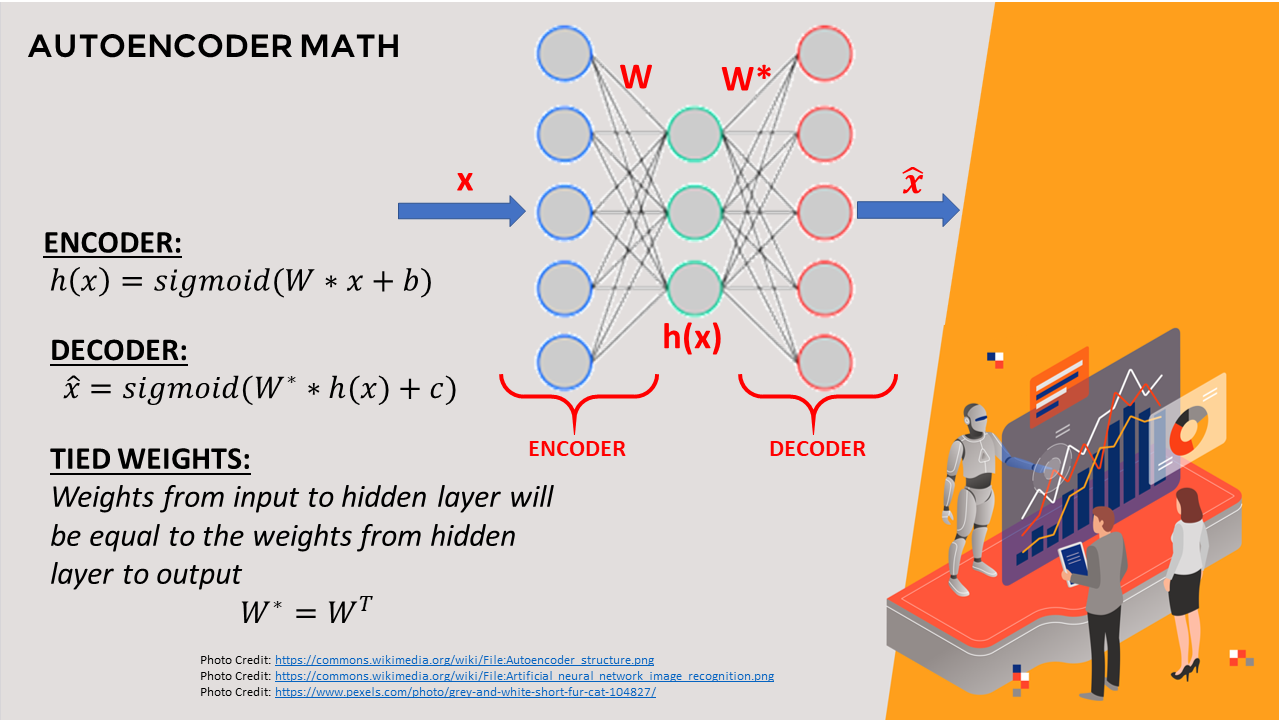

## TASK-9: APPLY AUTOENCODERS (PERFORM DIMENSIONALITY REDUCTION USING AUTOENCODERS)

In [42]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

encoding_dim = 7

input_df = Input(shape=(17,))

# Glorot normal initializer (Xavier normal initializer) draws samples from a truncated normal distribution

x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer= 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer= 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

# encoder
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss= 'mean_squared_error')

In [43]:
creditcard_df_scaled.shape

(8950, 17)

In [44]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size= 128, epochs= 25, verbose = 1)

Epoch 1/25
70/70 [==============================] - 3s 24ms/step - loss: 0.5600
Epoch 2/25
70/70 [==============================] - 2s 24ms/step - loss: 0.3626
Epoch 3/25
70/70 [==============================] - 2s 26ms/step - loss: 0.3003
Epoch 4/25
70/70 [==============================] - 2s 28ms/step - loss: 0.2514
Epoch 5/25
70/70 [==============================] - 2s 27ms/step - loss: 0.2207
Epoch 6/25
70/70 [==============================] - 2s 26ms/step - loss: 0.2095
Epoch 7/25
70/70 [==============================] - 2s 27ms/step - loss: 0.1949
Epoch 8/25
70/70 [==============================] - 2s 28ms/step - loss: 0.1800
Epoch 9/25
70/70 [==============================] - 2s 27ms/step - loss: 0.1702
Epoch 10/25
70/70 [==============================] - 2s 24ms/step - loss: 0.1481
Epoch 11/25
70/70 [==============================] - 2s 25ms/step - loss: 0.1359
Epoch 12/25
70/70 [==============================] - 2s 24ms/step - loss: 0.1274
Epoch 13/25
70/70 [==================

In [45]:
autoencoder.save_weights('autoencoder.h5')

In [46]:
pred = encoder.predict(creditcard_df_scaled)

280/280 [==============================] - 1s 3ms/step


In [47]:
pred.shape

(8950, 10)

C:\Users\mani2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mani2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mani2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mani2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\

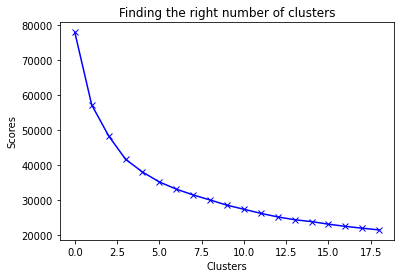

In [48]:
scores_2 = []
range_values = range(1, 20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(pred)
    scores_2.append(kmeans.inertia_)
      
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores')
plt.show()

C:\Users\mani2\AppData\Local\Temp/ipykernel_33336/3067751309.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(scores_1, 'bx-', color = 'r')
C:\Users\mani2\AppData\Local\Temp/ipykernel_33336/3067751309.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(scores_2, 'bx-', color = 'g')


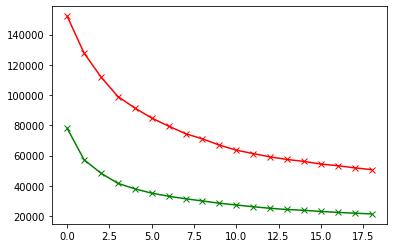

In [49]:
plt.plot(scores_1, 'bx-', color = 'r')
plt.plot(scores_2, 'bx-', color = 'g')

In [50]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)

C:\Users\mani2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mani2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [51]:
df_cluster_df = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis= 1)
df_cluster_df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0   201.802084        139.509787          0.000000      12        0  
1  4103.032597       1072.340217          0.222222      12        0  
2   622.066742        627.284787          0.000000      12        0  
3     0.000000        864.206542          0.000000      12        0  
4   678.334763        244.791237          0.000000      12        0

In [52]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns =['pca1','pca2'])
pca_df.head()

pca1      pca2
0 -1.990740 -0.216445
1  0.215765  1.195643
2 -0.871325 -0.219581
3 -1.110276 -0.040807
4 -2.187171 -0.179220

In [53]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

pca1      pca2  cluster
0 -1.990740 -0.216445        0
1  0.215765  1.195643        0
2 -0.871325 -0.219581        0
3 -1.110276 -0.040807        0
4 -2.187171 -0.179220        0

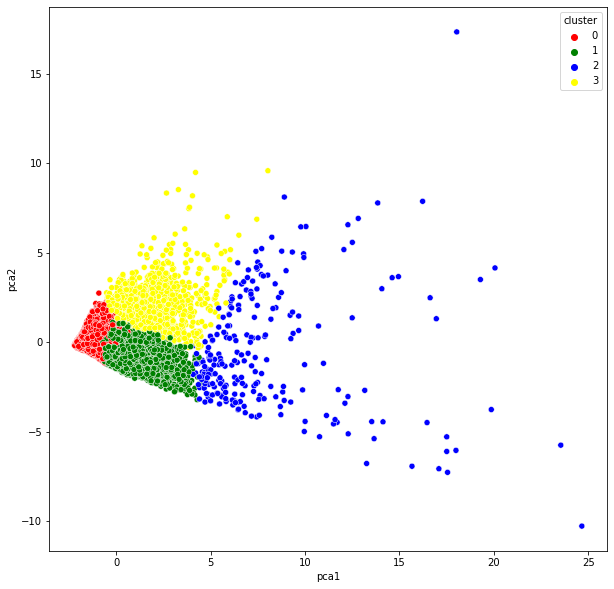

In [54]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','yellow'])
plt.show()

## END